In [10]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 764.2 kB/s eta 0:00:00a 0:00:01


In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

Prepare Data

In [12]:
mushroom_data = pd.read_csv('data/mushroom.csv')
mushroom_data.head()

cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1

In [13]:
cancer_data = pd.read_csv('data/breast_cancer.csv')
cancer_data.head()

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1        1      2  
1           10                3                2        1      2  
2            2                3                1        1      2  
3            4                3                7        1      2  
4            1                3                1        1      2

In [51]:
cX = cancer_data.drop(columns=['Class'])
cy = cancer_data['Class']
cX_train, cX_test, cy_train, cy_test = train_test_split(cX, cy, test_size=0.2, random_state=34)

Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
678              776715                3                        1   
679              841769                2                        1   
680              888820                5                       10   
681              897471                4                        8   
682              897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
678                         1                  1                            3   
679                         1                  1                            2   
680                        10                  3                            7   
681                         6                  4                            3   
682                         8                  5                            4   

     Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  
0              1                3                1        1  
1             10                3                2        1  
2              2                3                1        1  
3              4                3                7        1  
4              1                3                1        1  
..           ...              ...              ...      ...  
678            2                1                1        1  
679            1                1                1        1  
680            3                8               10        2  
681            4               10                6        1  
682            5               10                4        1  

[683 rows x 10 columns]

In [55]:
scaler = StandardScaler()
# scaler = scaler.fit(cX_train)
cX_train = scaler.fit_transform(cX_train)
cX_test = scaler.transform(cX_test)

In [56]:
architectures = [
    (10, 10),
    (50, 50, 50),
    (100, 50, 25),
    (50, 25),
    (100,)
]

activation_functions = ['relu', 'logistic', 'tanh', 'identity']

In [59]:
results = []
for architecture in architectures:
    for activation_function in activation_functions:
        nn = MLPClassifier(hidden_layer_sizes=architecture, activation=activation_function, max_iter=1000, random_state=34)
        nn.fit(cX_train, cy_train)
        
        predictions = nn.predict(cX_test)
        conf_matrix = cm(cy_test, predictions)
        class_report = cr(cy_test, predictions)
        
        train_sizes, train_scores, validation_scores = learning_curve(
            estimator=nn,
            X=cX_train,
            y=cy_train,
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        validation_mean = np.mean(validation_scores, axis=1)
        validation_std = np.std(validation_scores, axis=1)
        
        
        results.append(
            {'architecture': architecture,
             'activation_function': activation_function,
             'nn': nn,
             'confusion_matrix': conf_matrix,
             'classification_report': class_report,
             'train_mean': train_mean,
             'train_std': train_std,
             'train_sizes': train_sizes,
             'validation_mean': validation_mean,
             'validation_std': validation_std}
        )

/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reac

Generate results

Architecture: (10, 10), Activation: relu
Confusion Matrix:
[[83  4]
 [ 2 48]]
Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.95      0.97        87
           4       0.92      0.96      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137


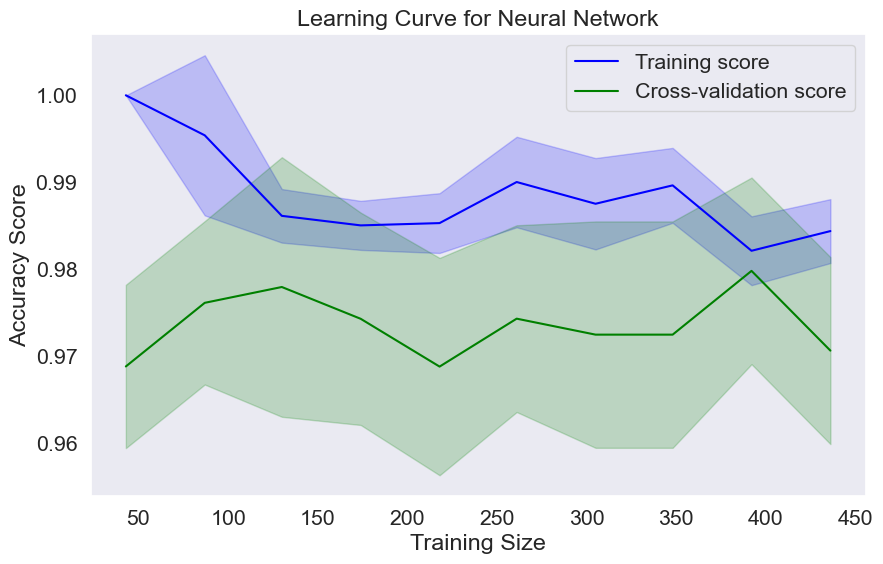

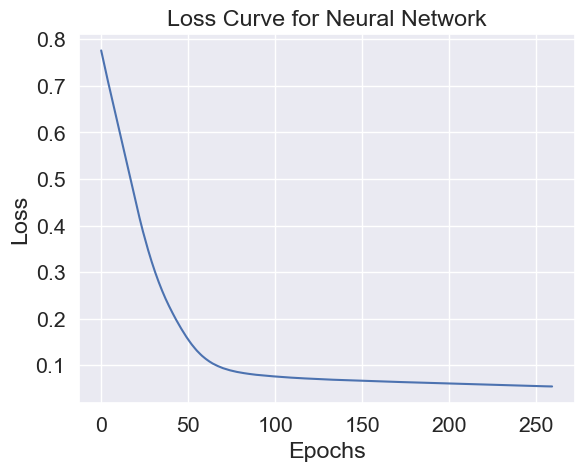

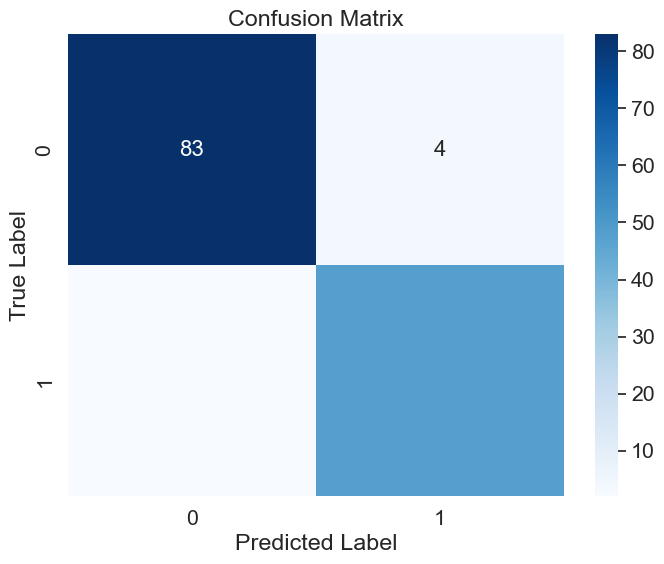

Architecture: (10, 10), Activation: logistic
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


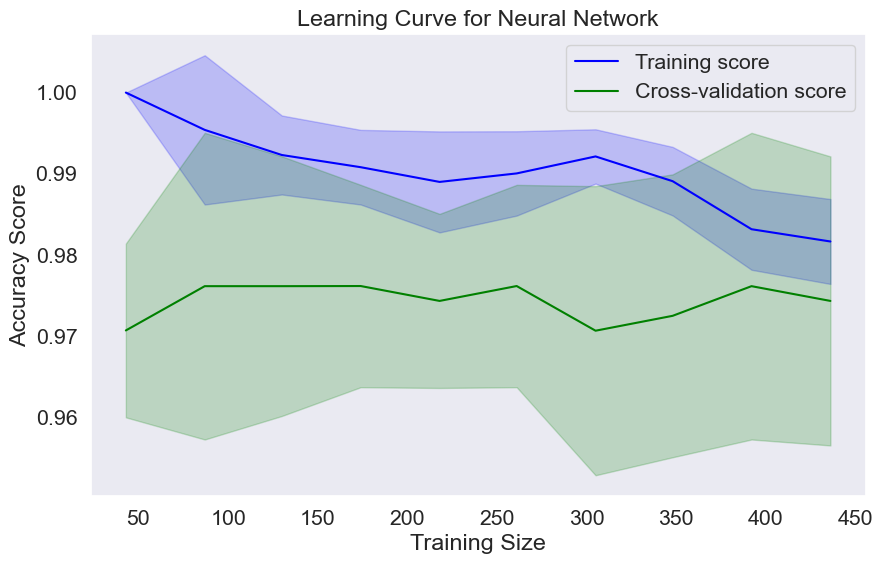

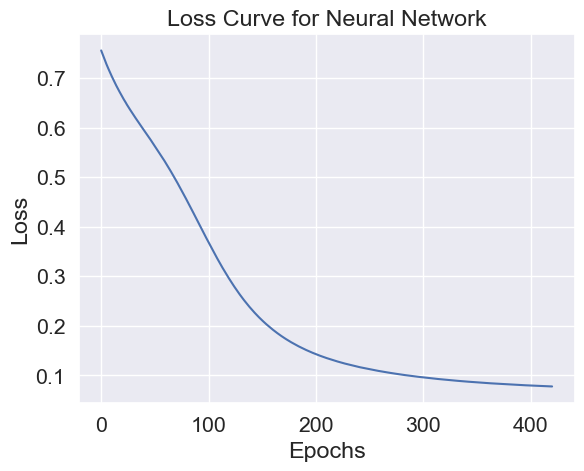

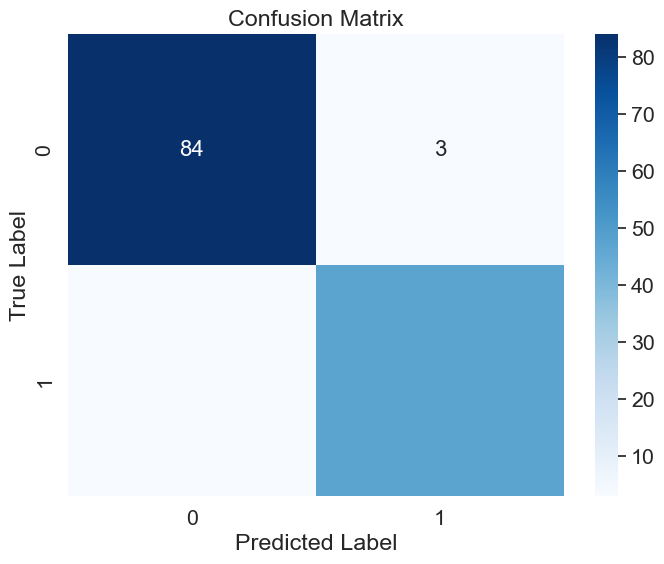

Architecture: (10, 10), Activation: tanh
Confusion Matrix:
[[83  4]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.95      0.95        87
           4       0.92      0.92      0.92        50

    accuracy                           0.94       137
   macro avg       0.94      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137


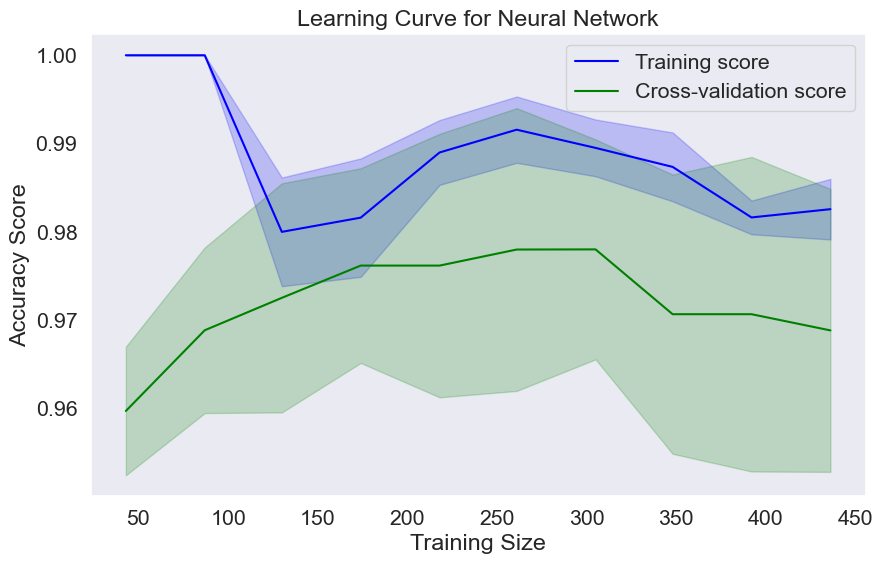

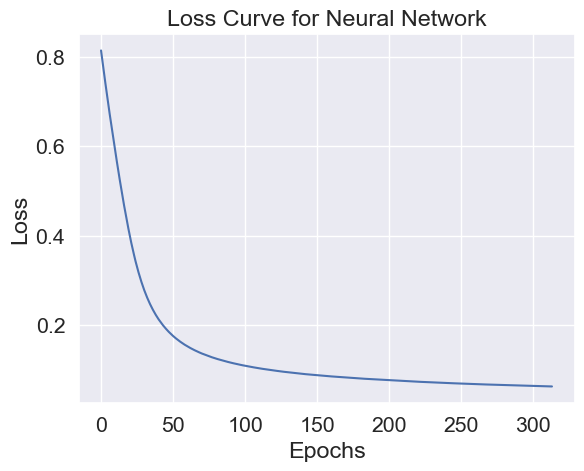

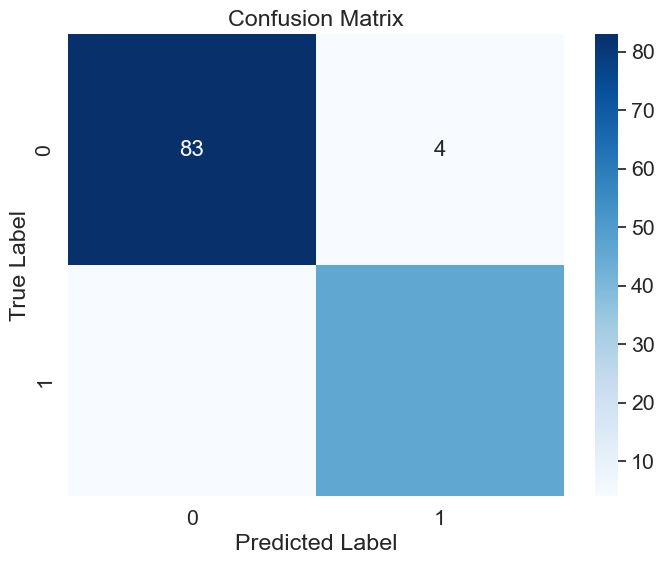

Architecture: (10, 10), Activation: identity
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


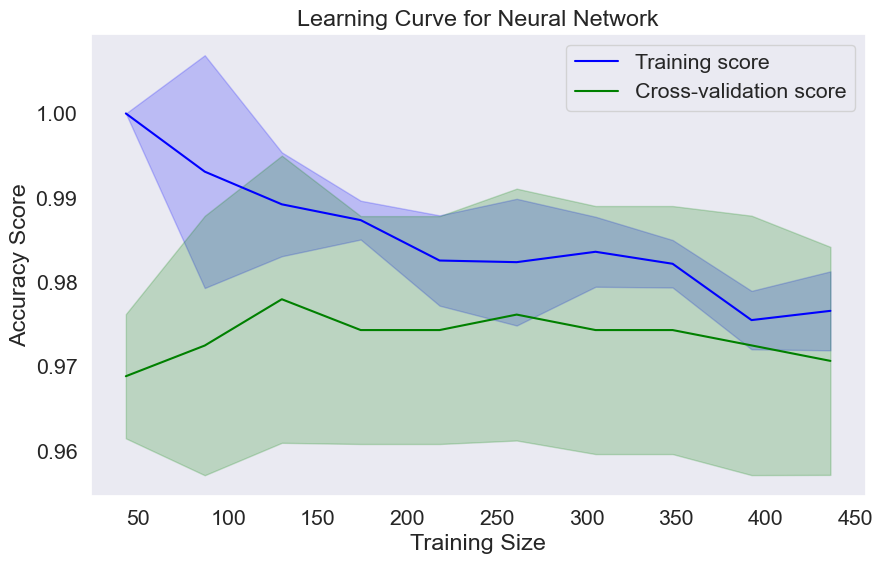

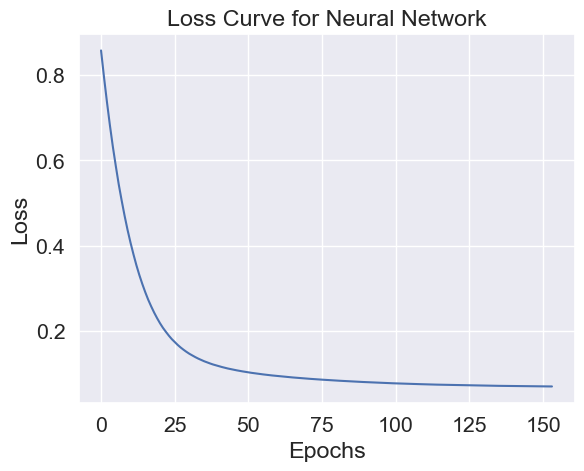

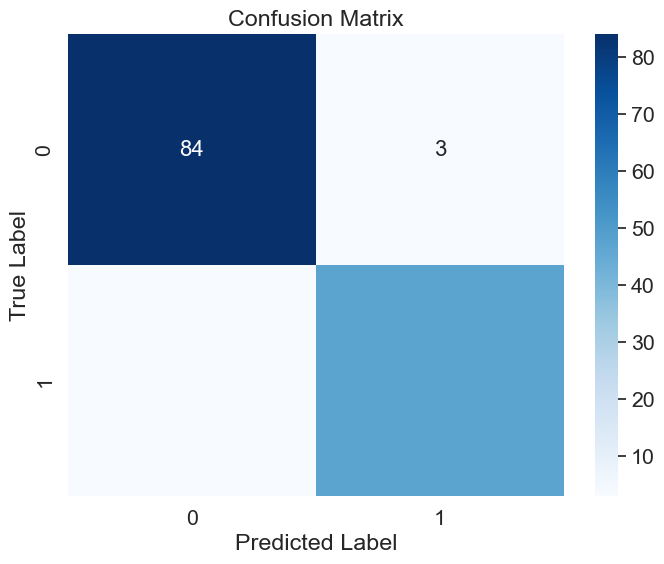

Architecture: (50, 50, 50), Activation: relu
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


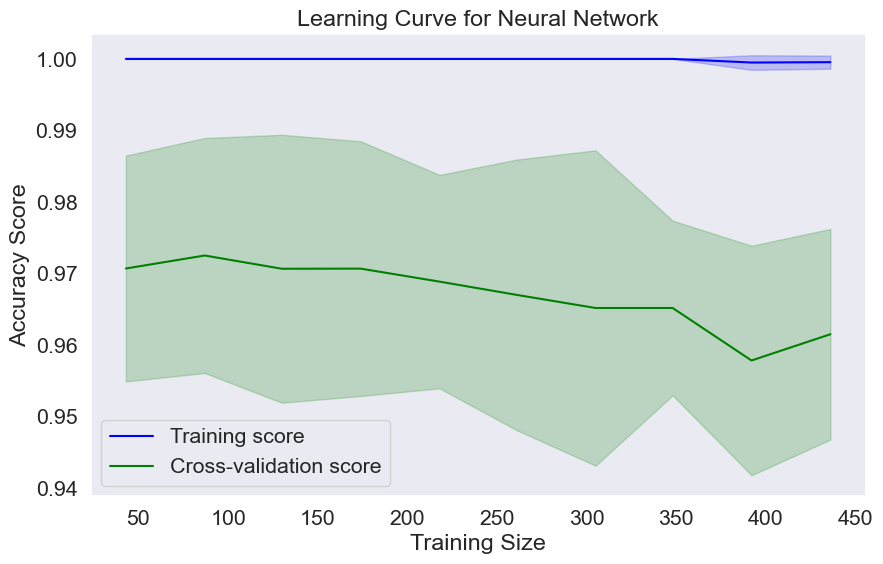

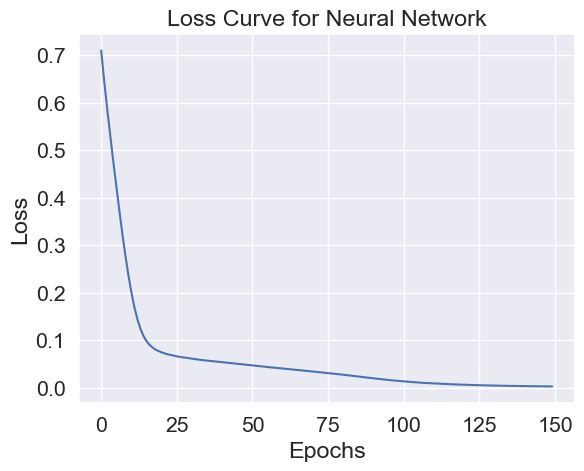

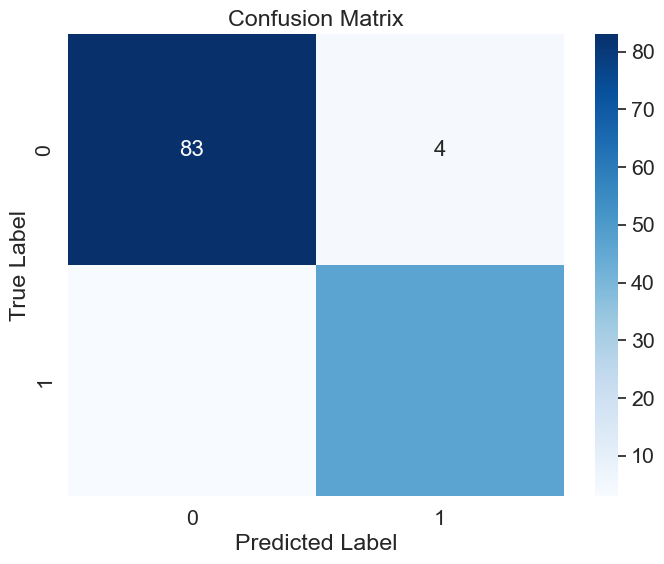

Architecture: (50, 50, 50), Activation: logistic
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


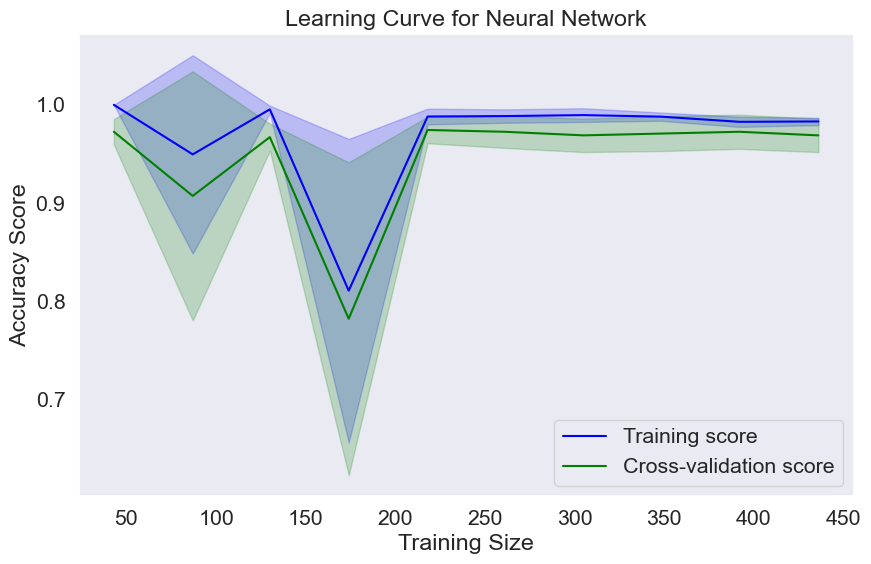

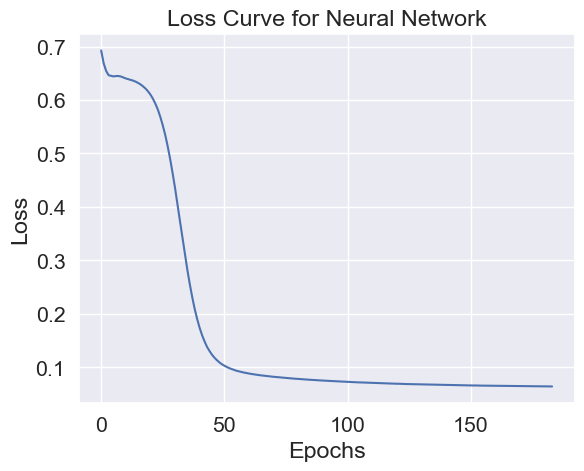

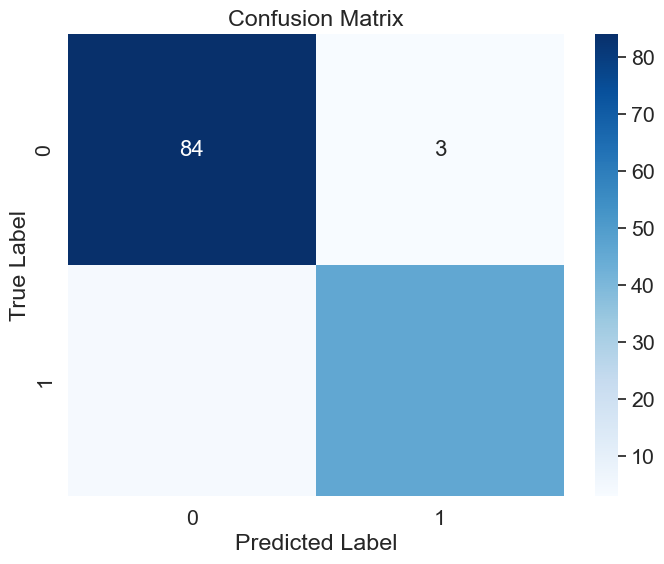

Architecture: (50, 50, 50), Activation: tanh
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


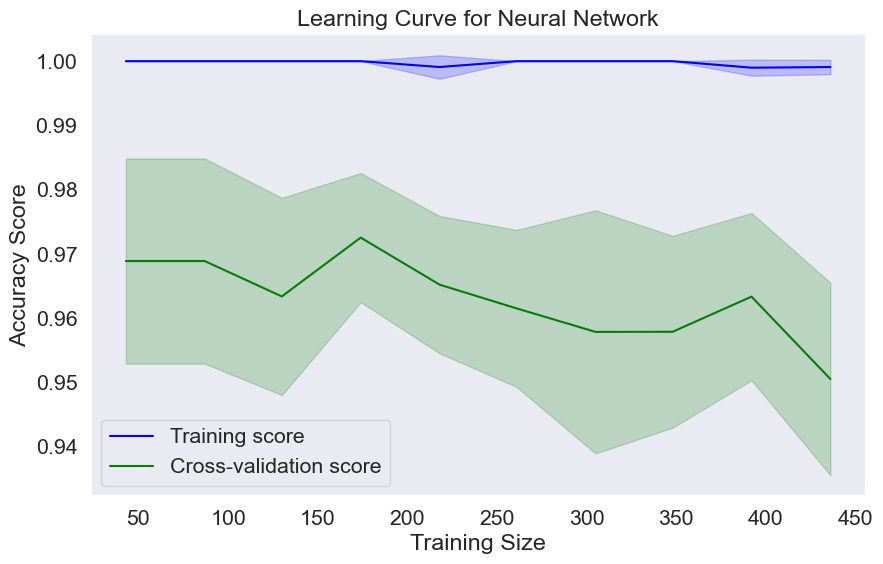

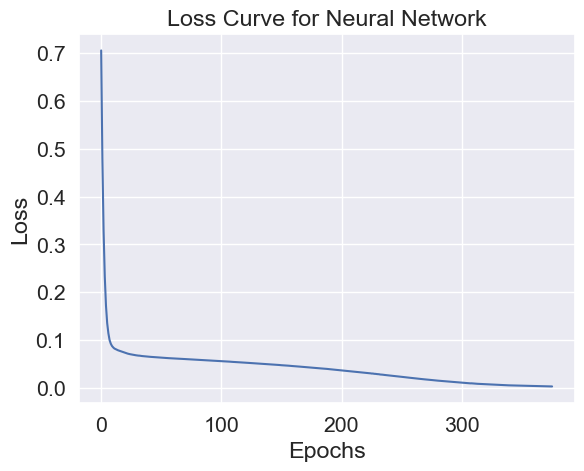

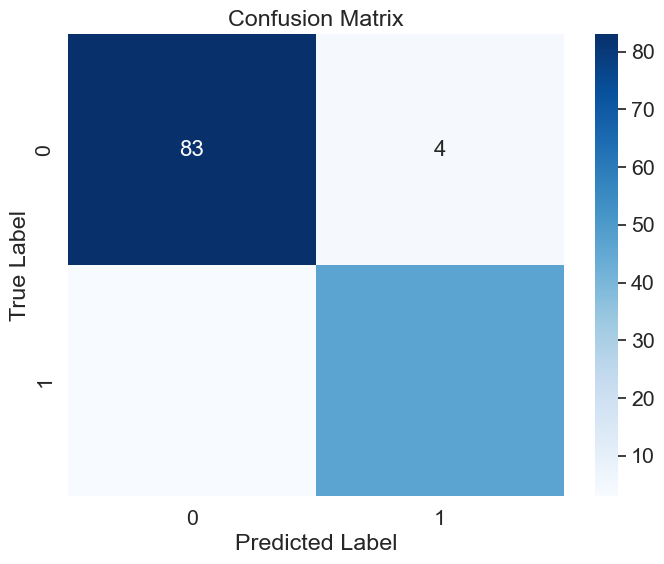

Architecture: (50, 50, 50), Activation: identity
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


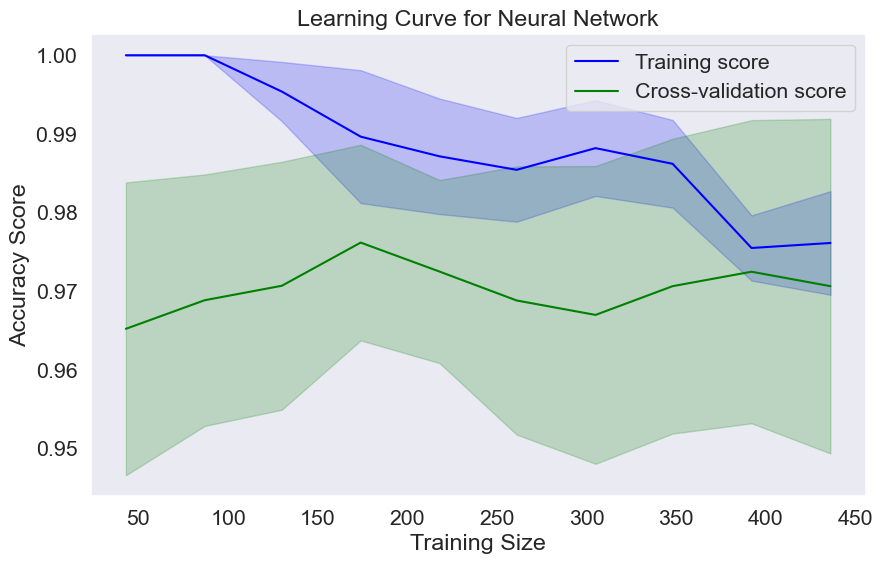

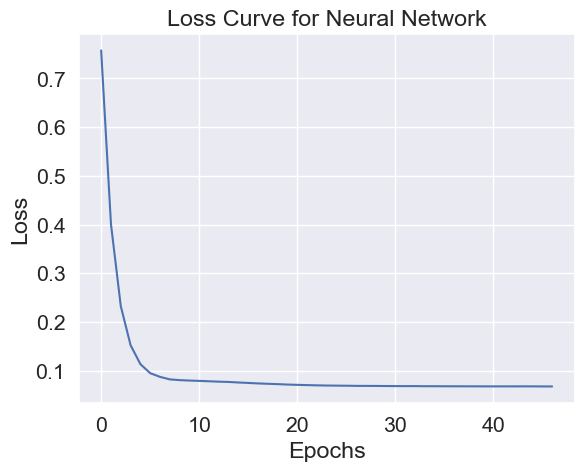

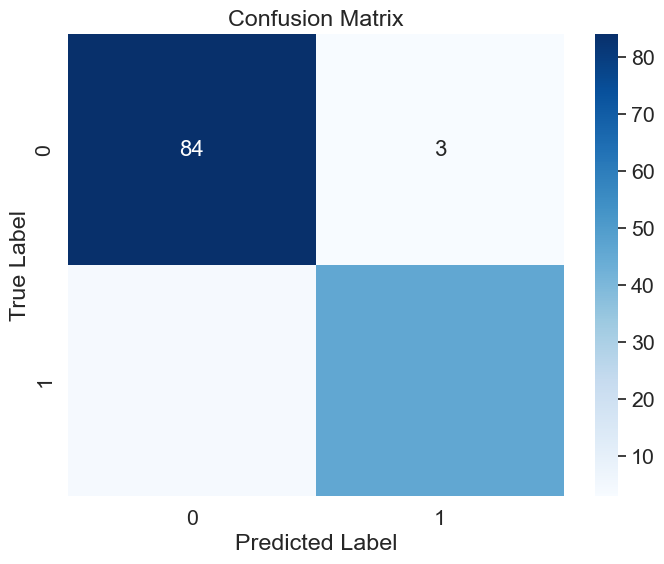

Architecture: (100, 50, 25), Activation: relu
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


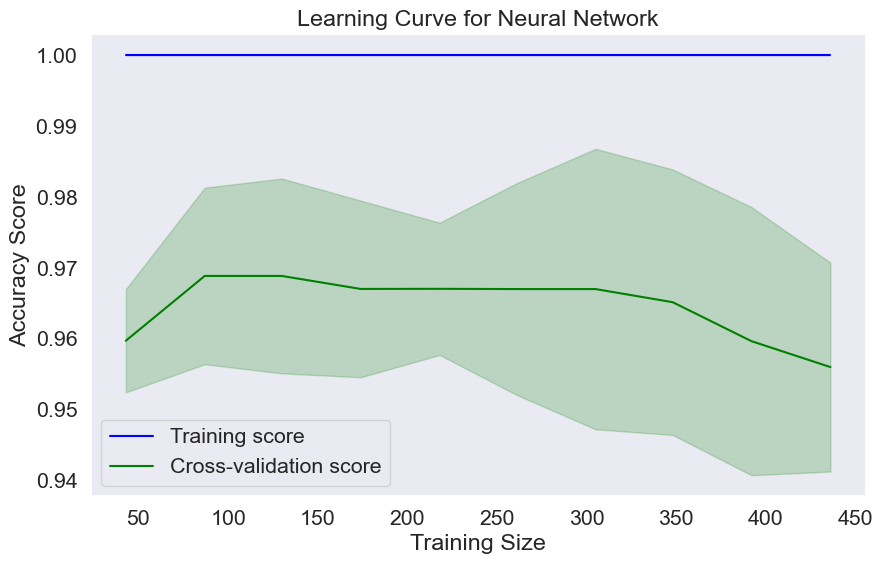

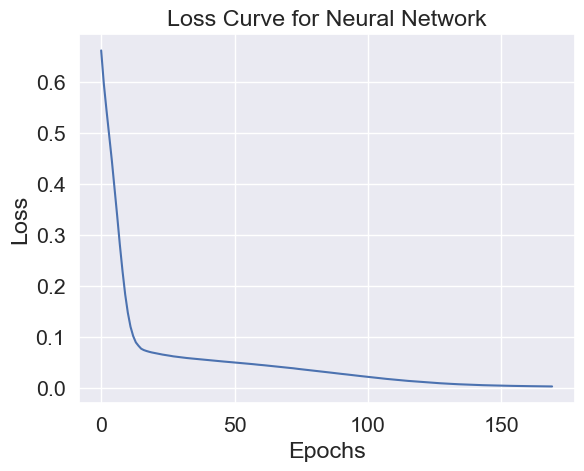

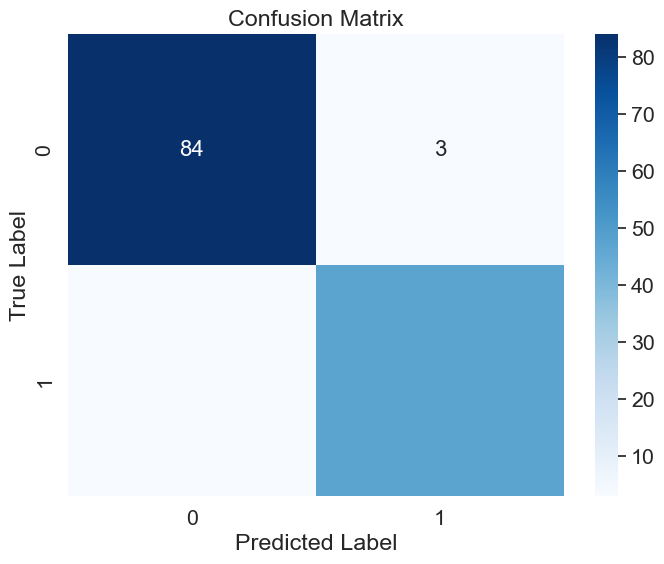

Architecture: (100, 50, 25), Activation: logistic
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


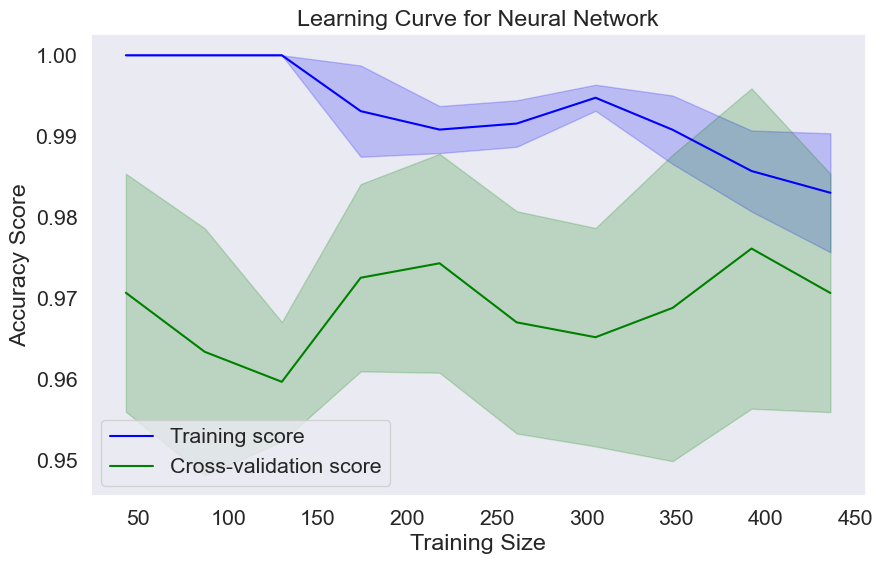

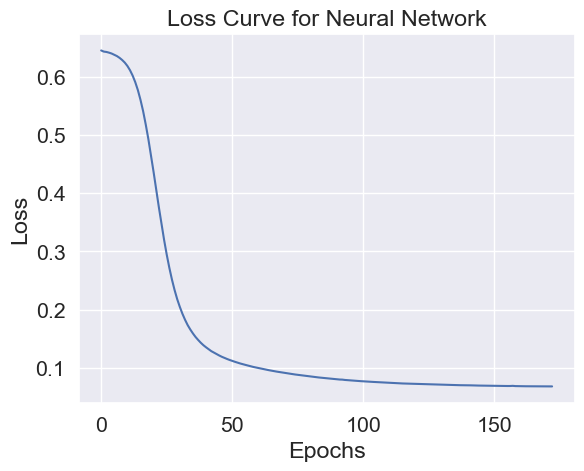

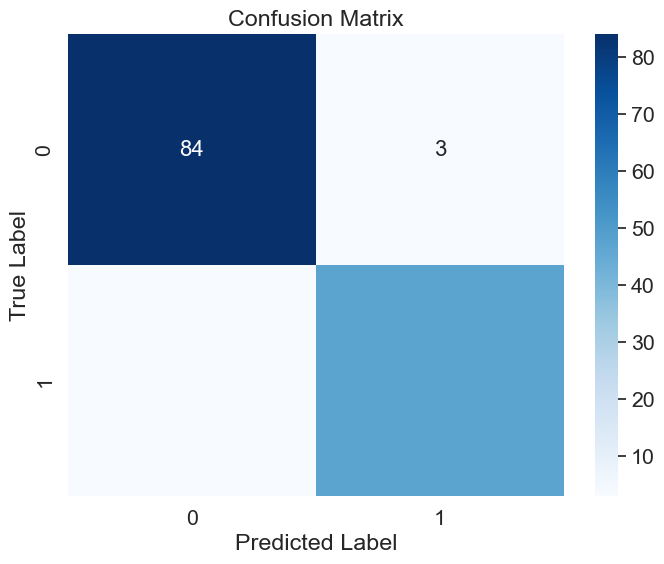

Architecture: (100, 50, 25), Activation: tanh
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


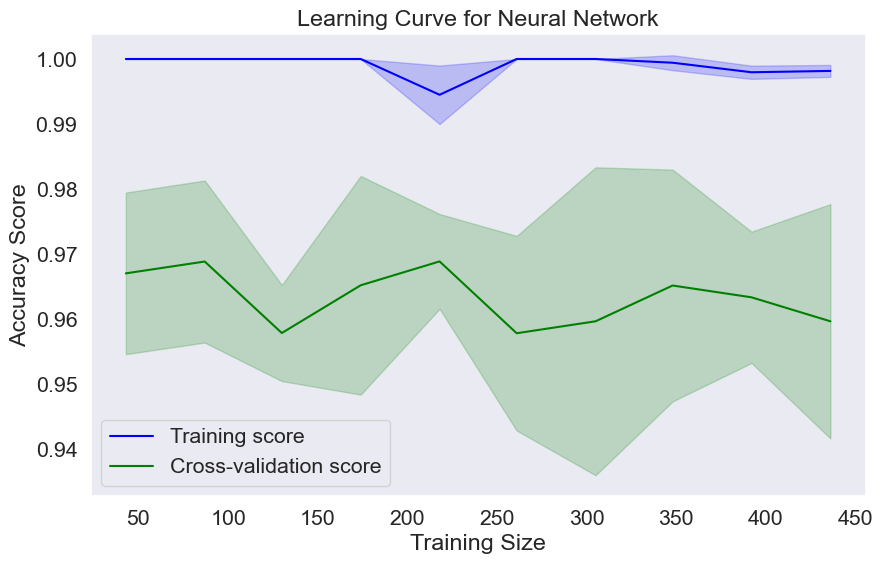

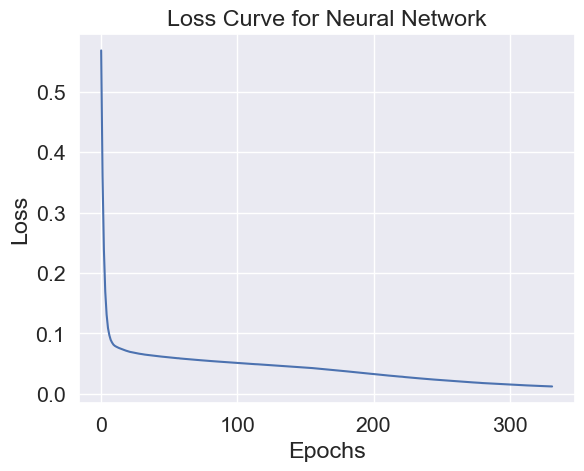

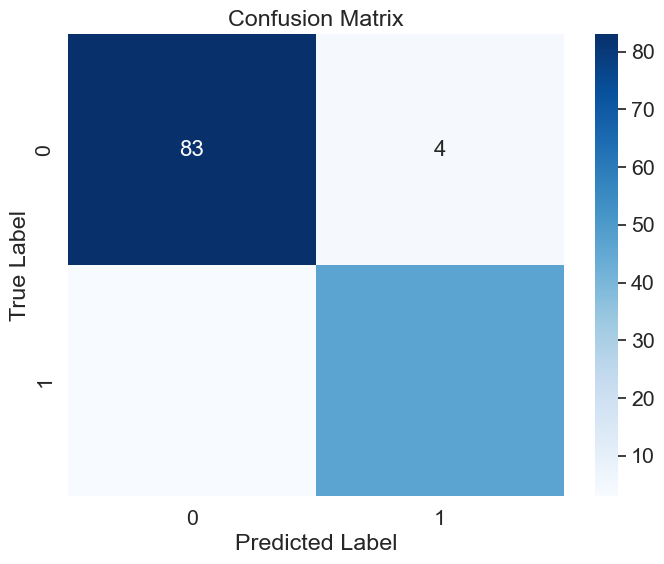

Architecture: (100, 50, 25), Activation: identity
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


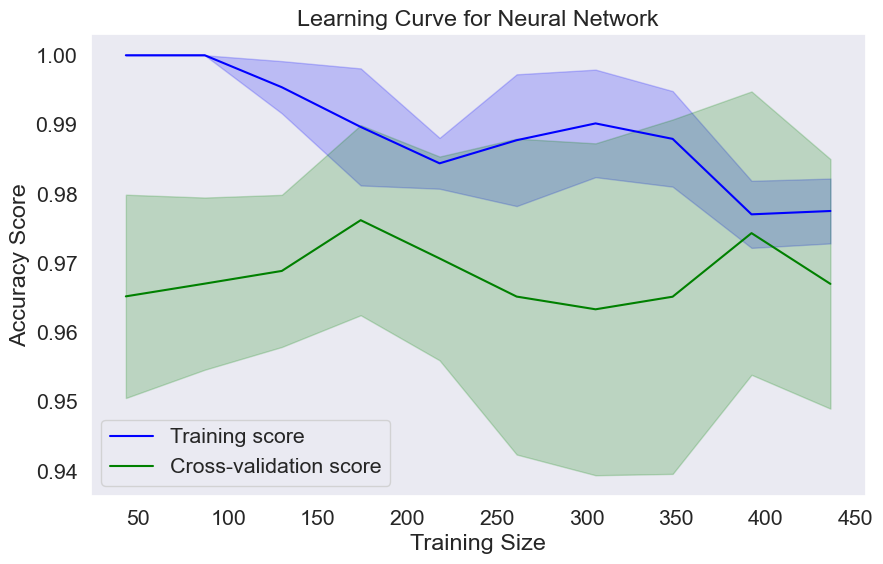

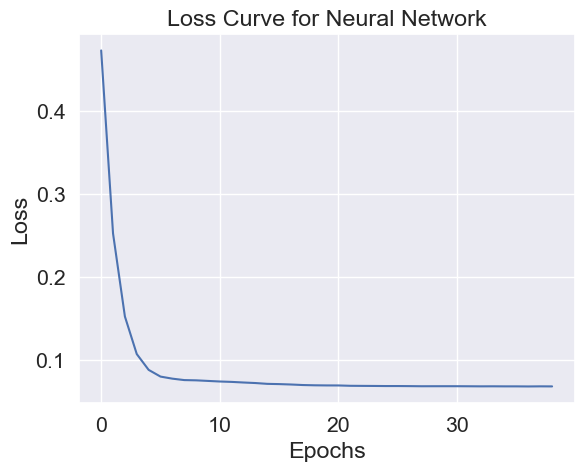

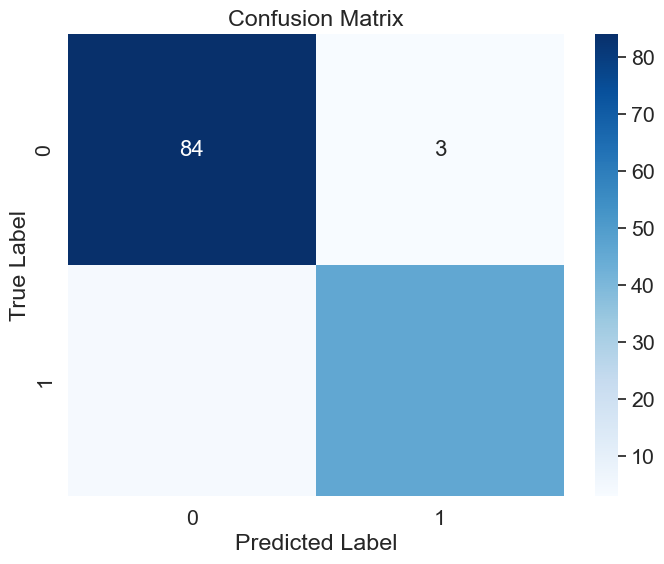

Architecture: (50, 25), Activation: relu
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


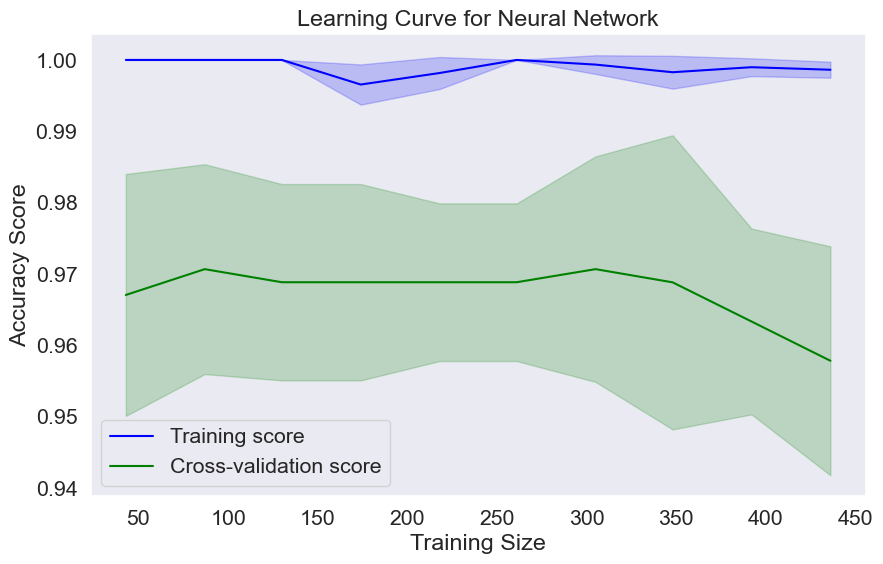

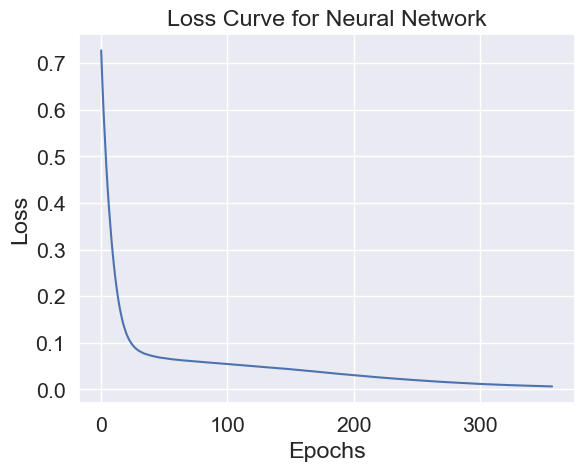

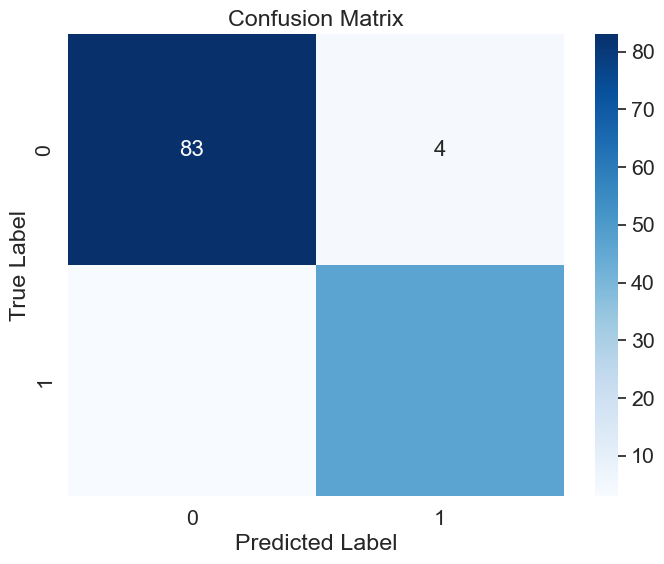

Architecture: (50, 25), Activation: logistic
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


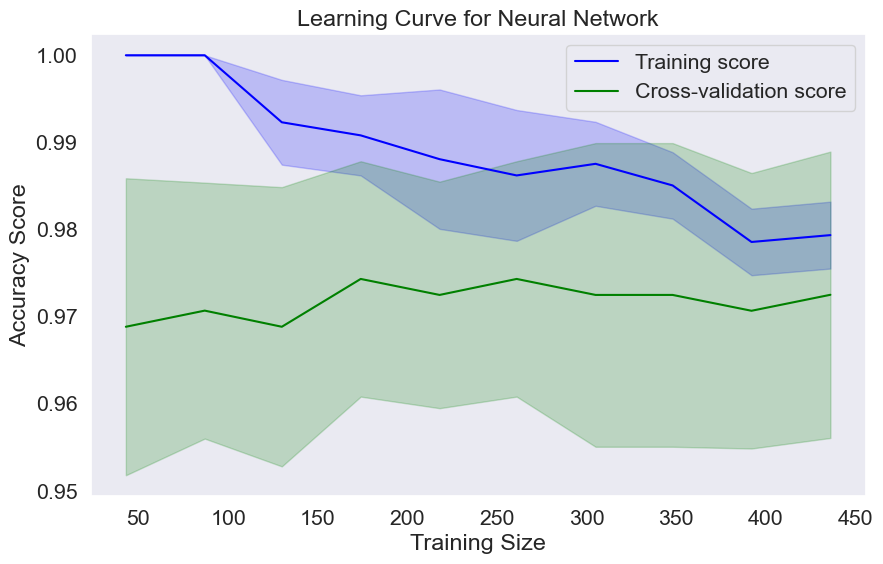

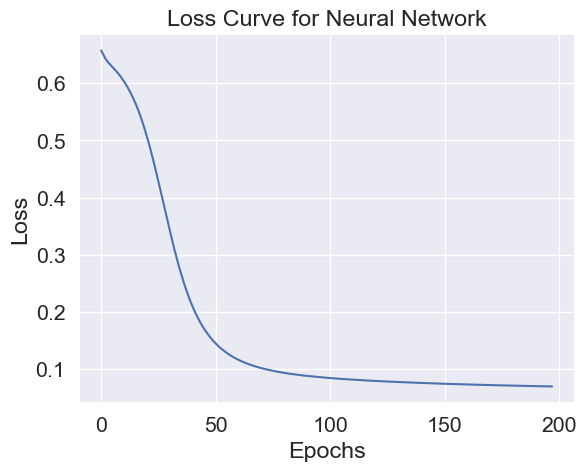

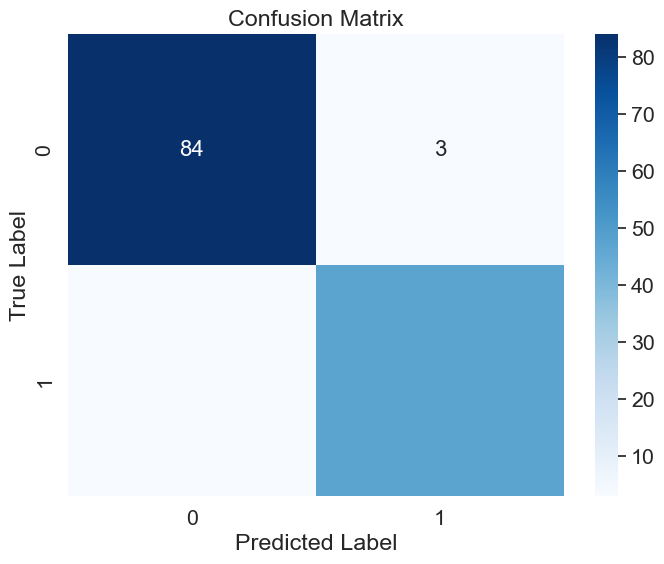

Architecture: (50, 25), Activation: tanh
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


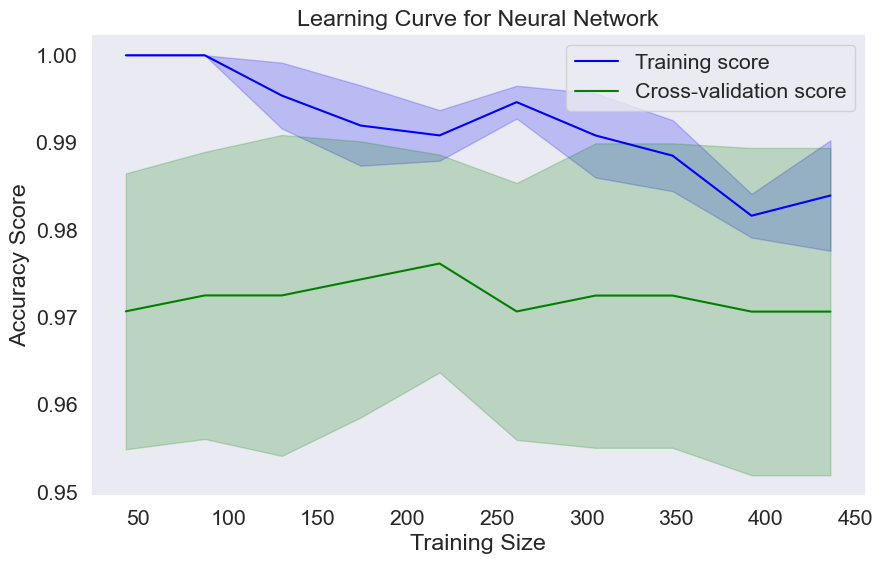

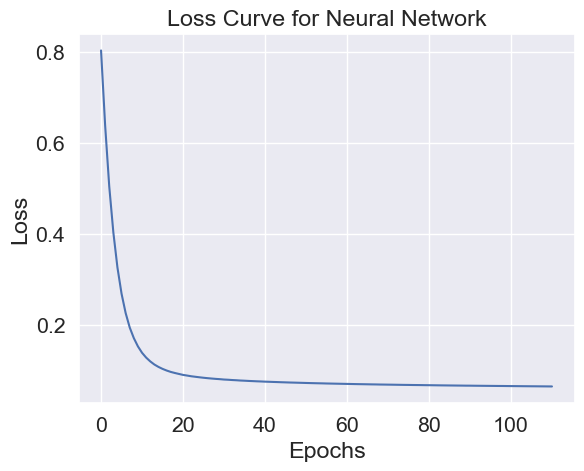

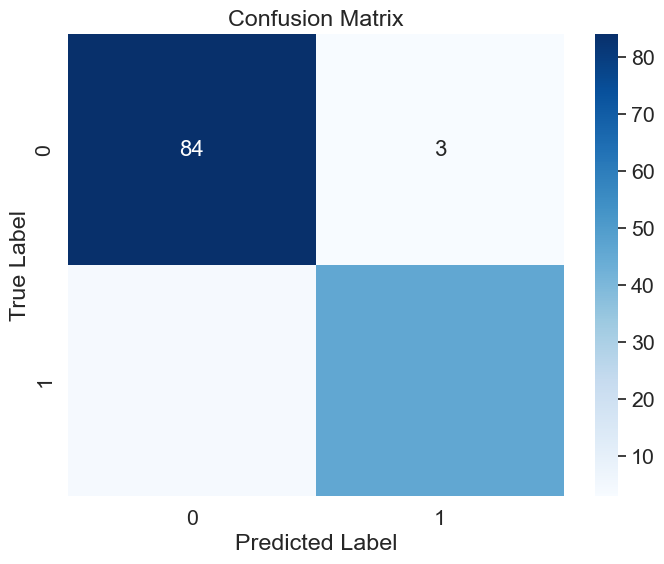

Architecture: (50, 25), Activation: identity
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


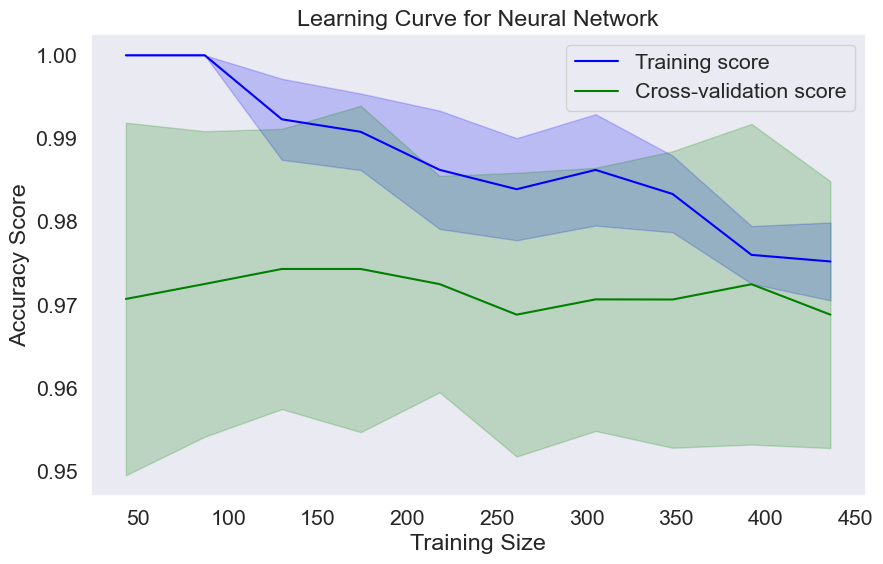

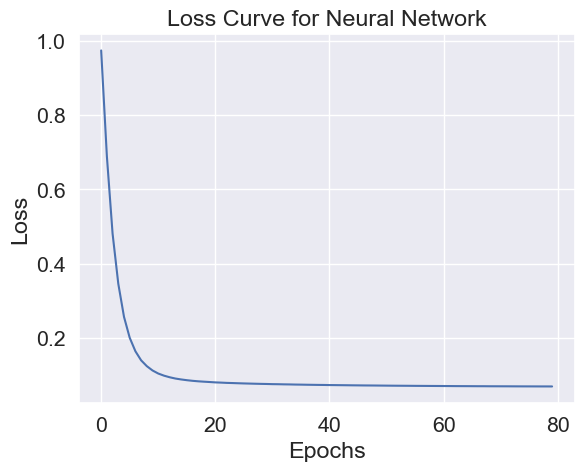

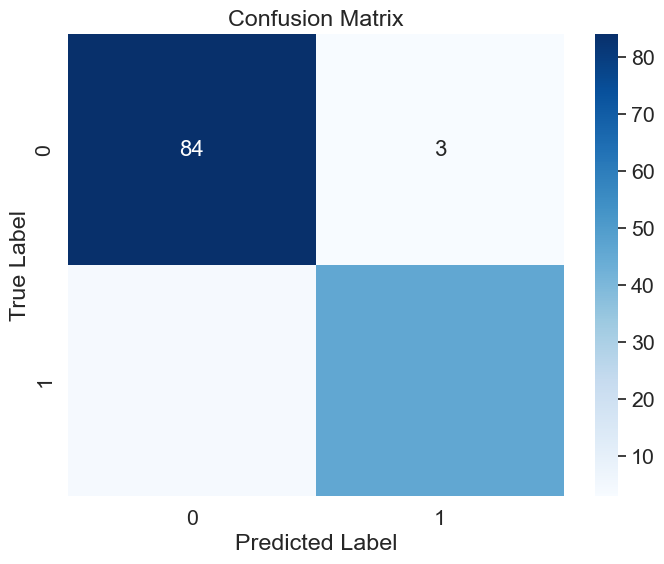

Architecture: (100,), Activation: relu
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


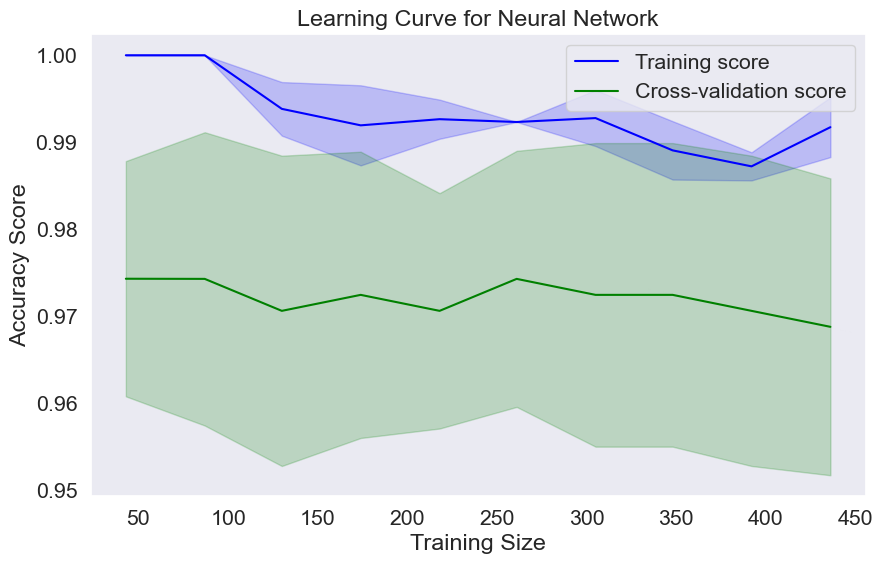

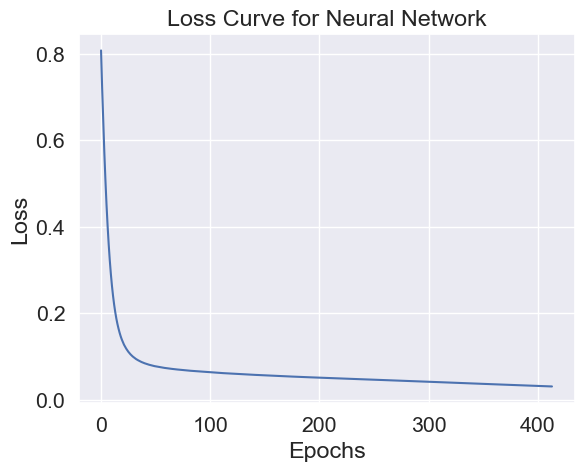

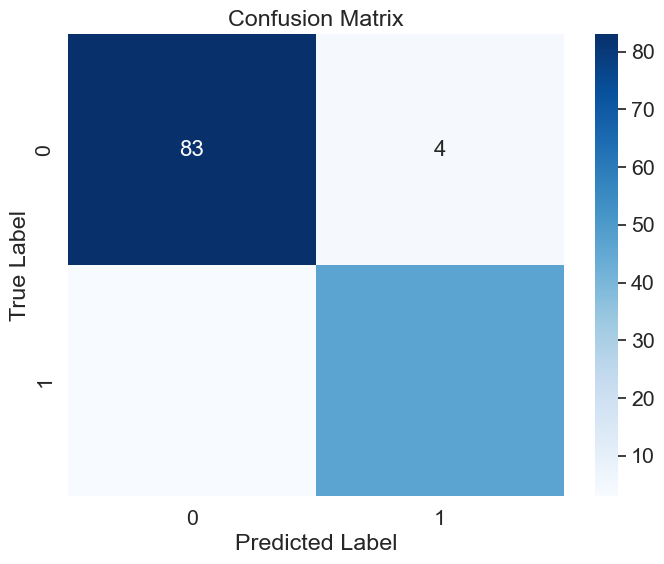

Architecture: (100,), Activation: logistic
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


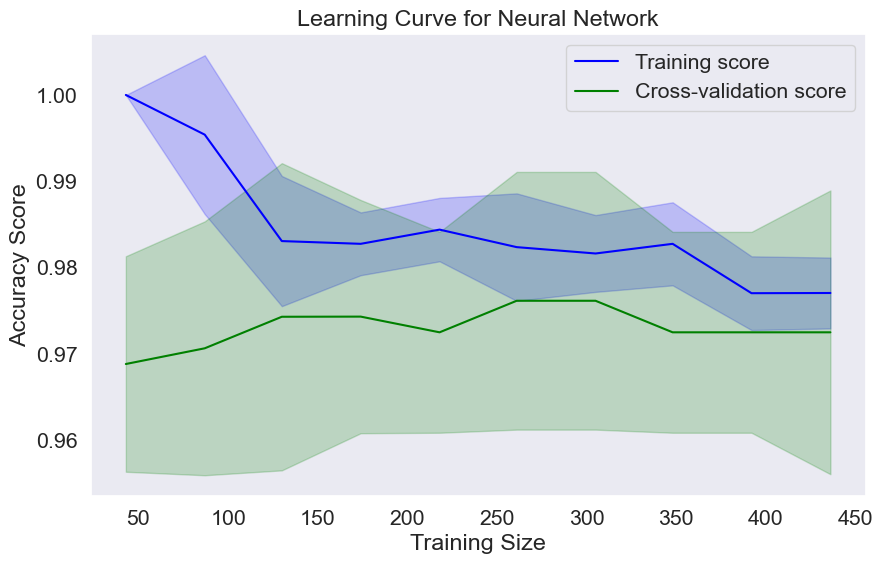

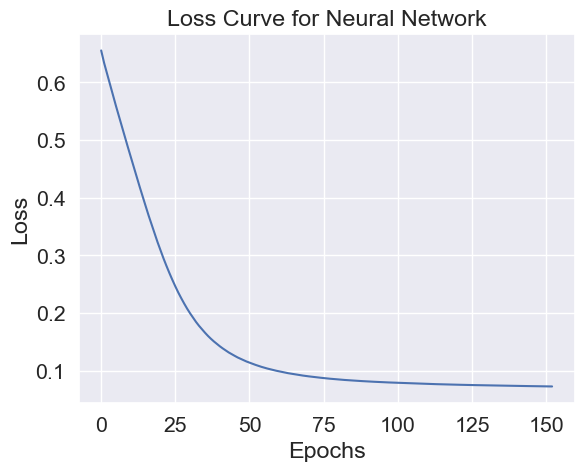

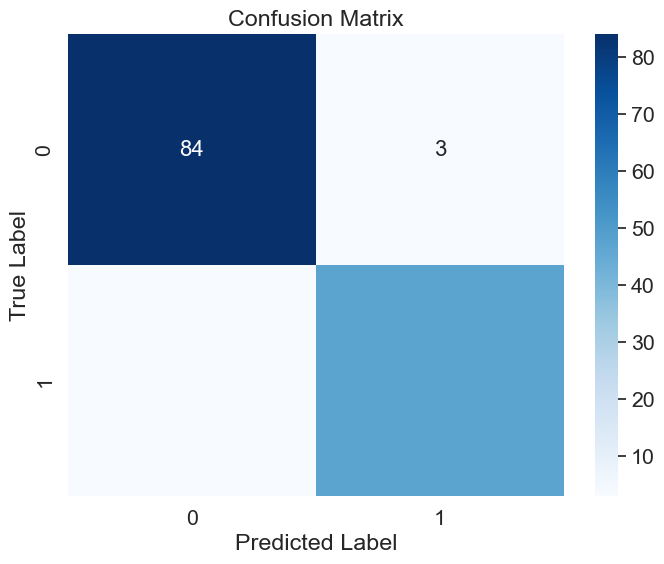

Architecture: (100,), Activation: tanh
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


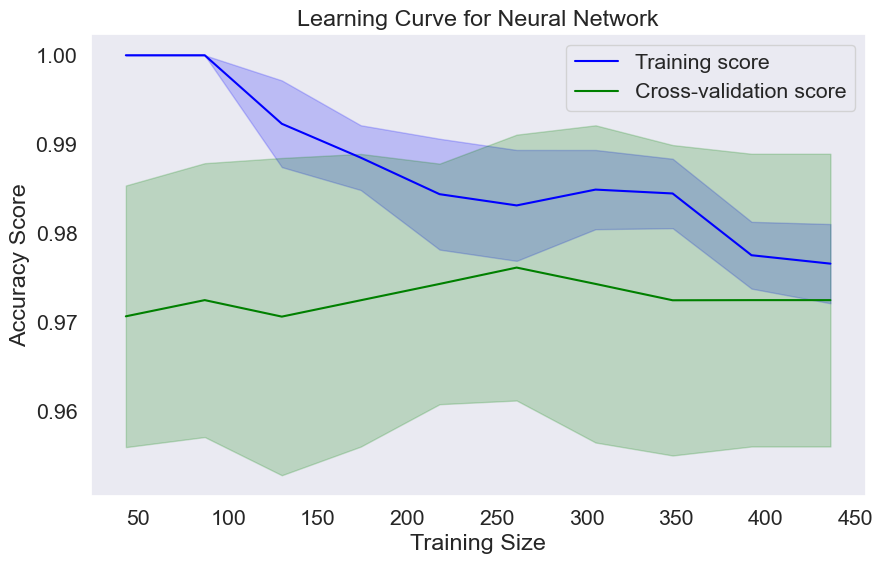

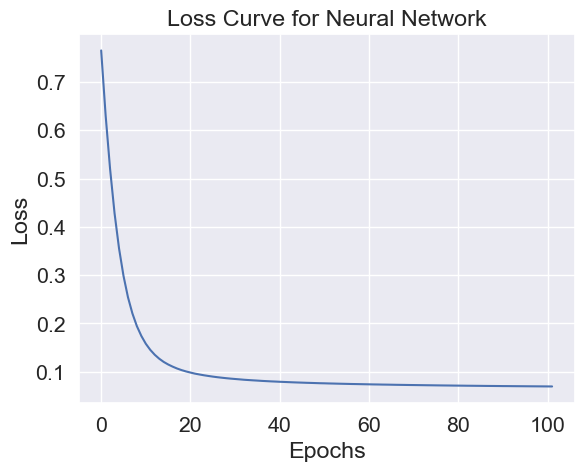

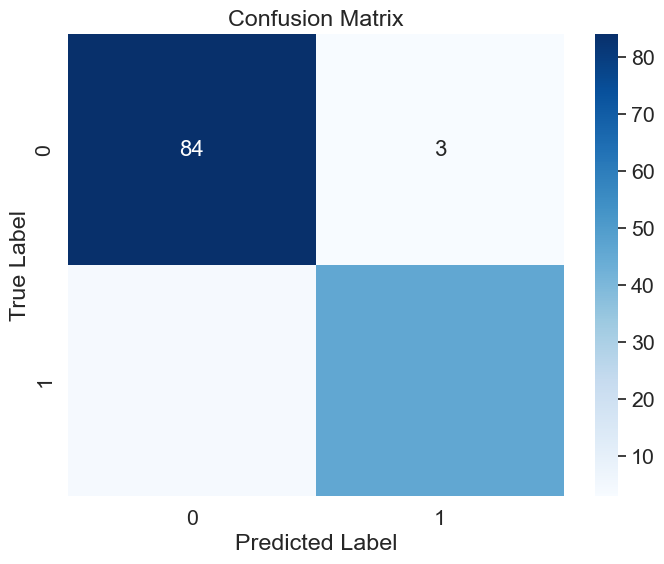

Architecture: (100,), Activation: identity
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


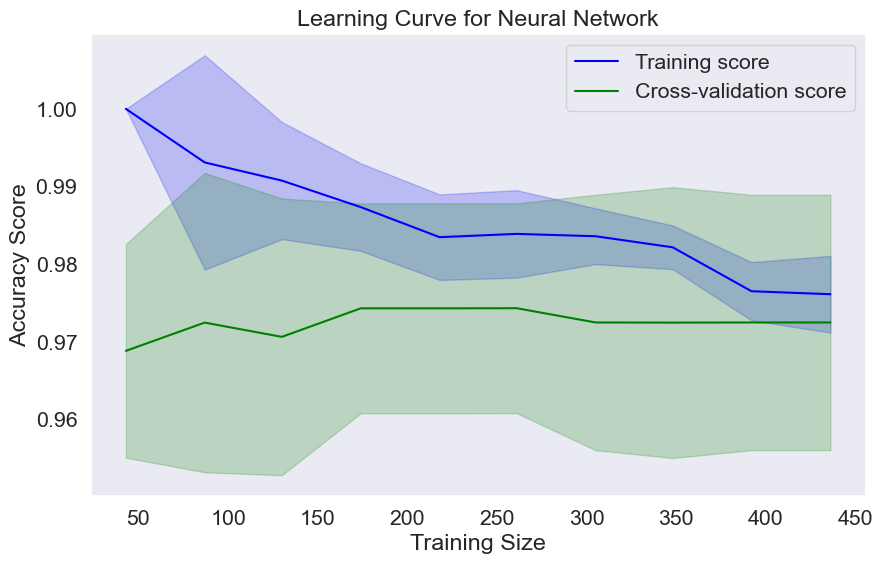

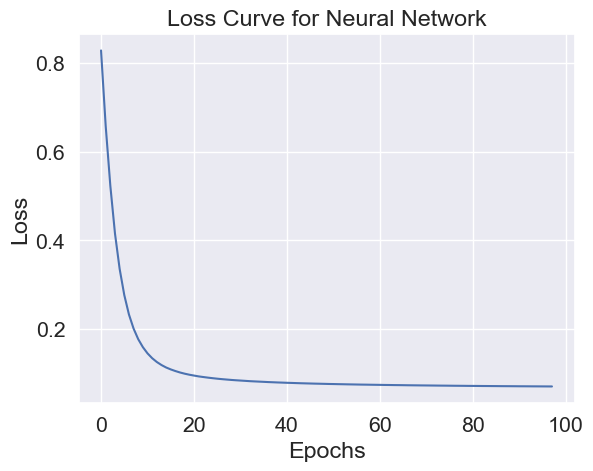

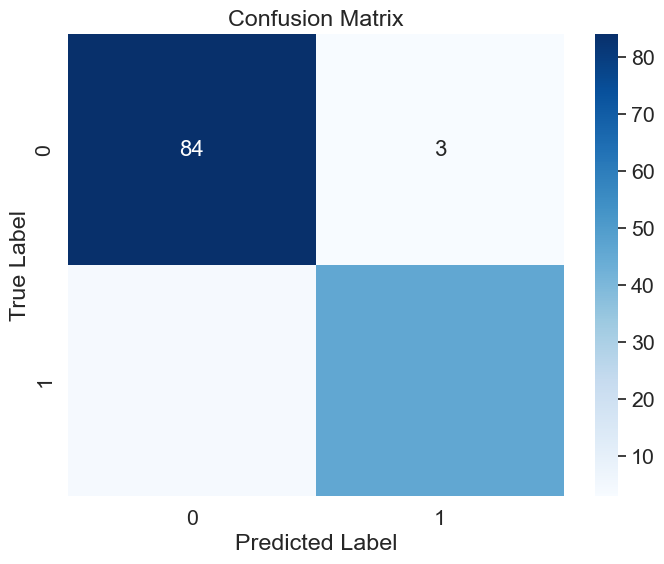

In [61]:
for result in results:
    print(f"Architecture: {result['architecture']}, Activation: {result['activation_function']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(result['train_sizes'], result['train_mean'], label='Training score', color='blue')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], color='blue', alpha=0.2)
    plt.plot(result['train_sizes'], result['validation_mean'], label='Cross-validation score', color='green')
    plt.fill_between(result['train_sizes'], result['validation_mean'] - result['validation_std'], result['validation_mean'] + result['validation_std'], color='green', alpha=0.2)

    plt.title('Learning Curve for Neural Network')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    plt.plot(result['nn'].loss_curve_)
    plt.title('Loss Curve for Neural Network')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [62]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Store results
knn_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(cX_train, cy_train)
    
    predictions = knn.predict(cX_test)
    conf_matrix = cm(cy_test, predictions)
    class_report = cr(cy_test, predictions)
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=knn,
        X=cX_train,
        y=cy_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    knn_results.append(
        {'k': k,
         'knn': knn,
         'confusion_matrix': conf_matrix,
         'classification_report': class_report,
         'train_mean': train_mean,
         'train_std': train_std,
         'train_sizes': train_sizes,
         'validation_mean': validation_mean,
         'validation_std': validation_std}
    )

k: 1
Confusion Matrix:
[[83  4]
 [ 6 44]]
Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.95      0.94        87
           4       0.92      0.88      0.90        50

    accuracy                           0.93       137
   macro avg       0.92      0.92      0.92       137
weighted avg       0.93      0.93      0.93       137


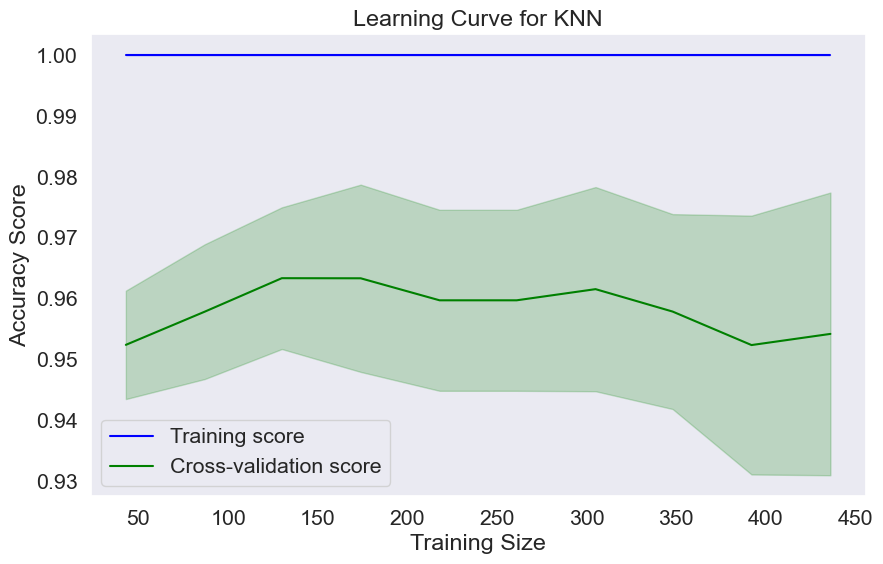

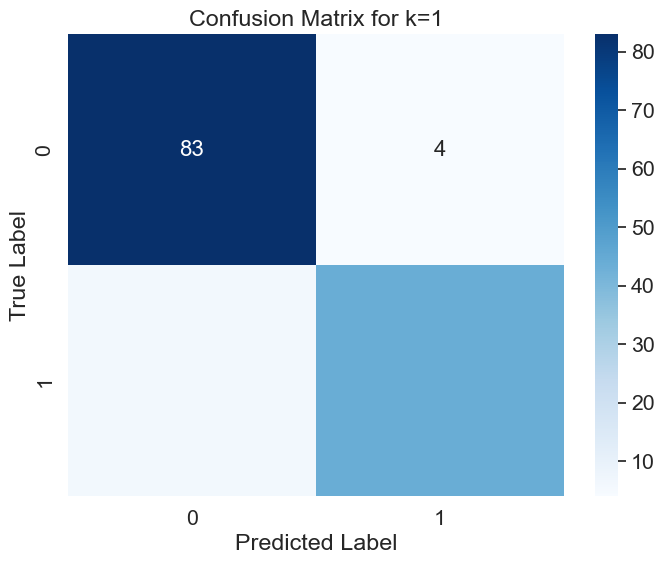

k: 3
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


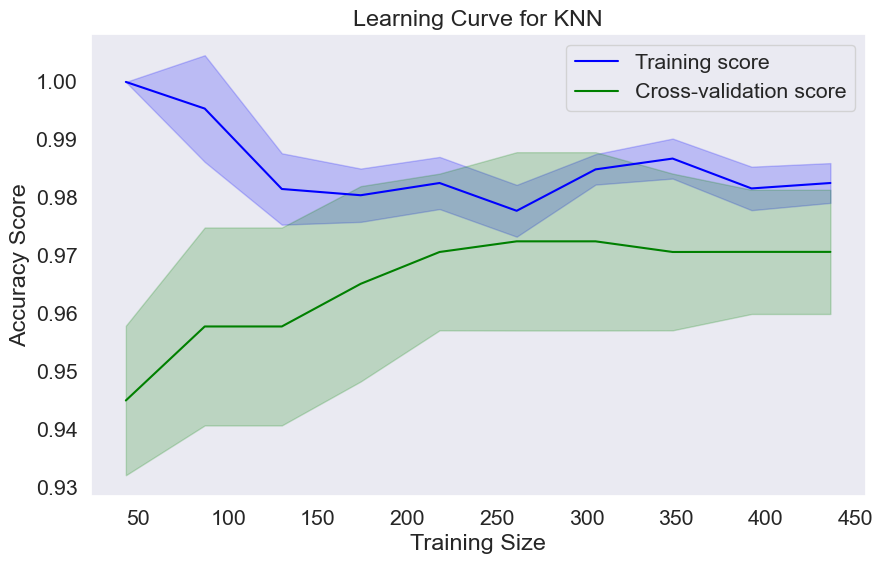

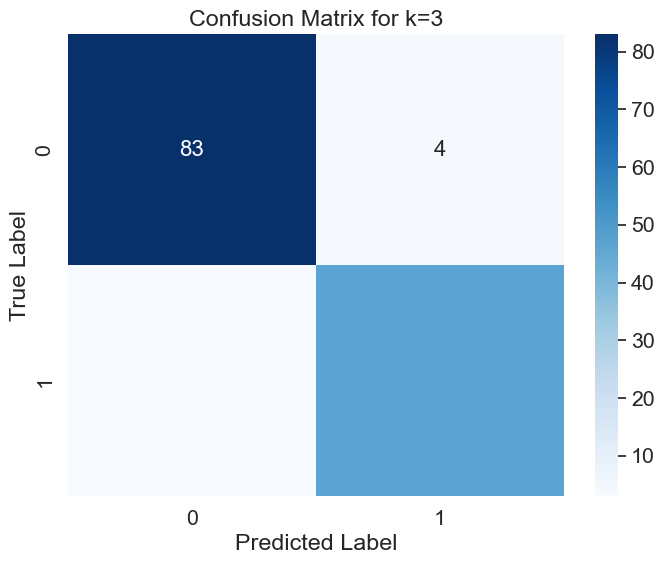

k: 5
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


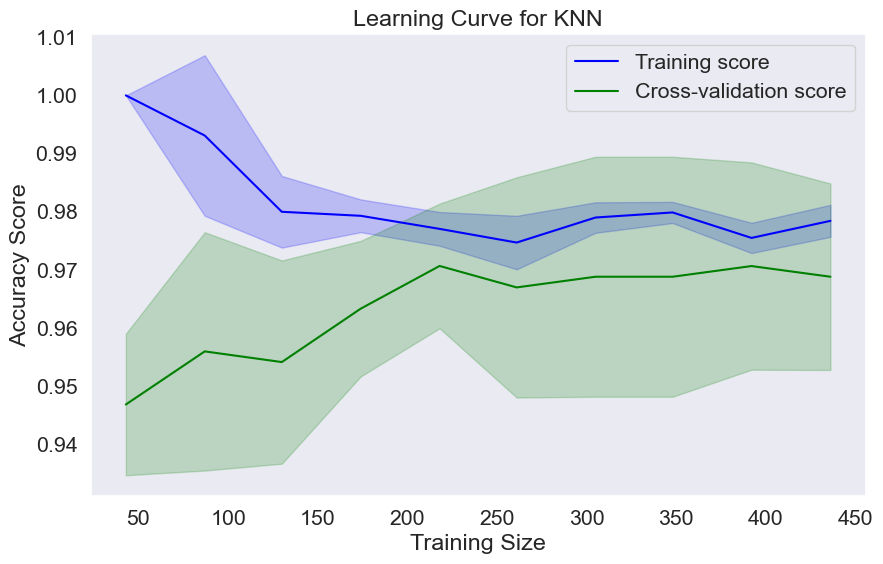

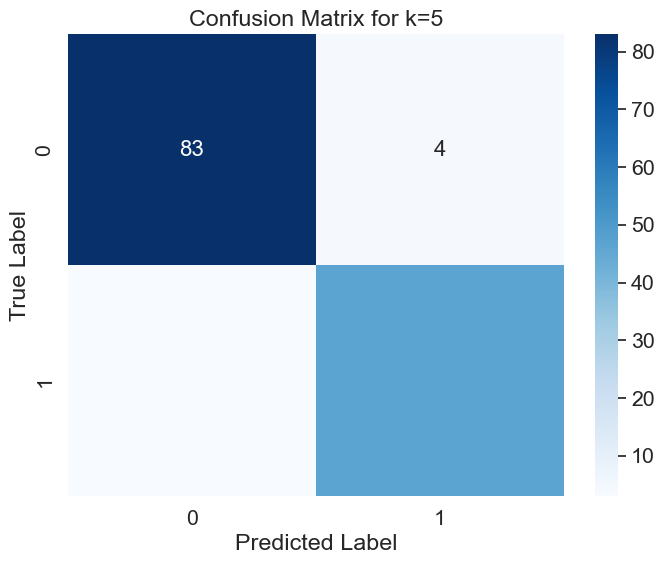

k: 7
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


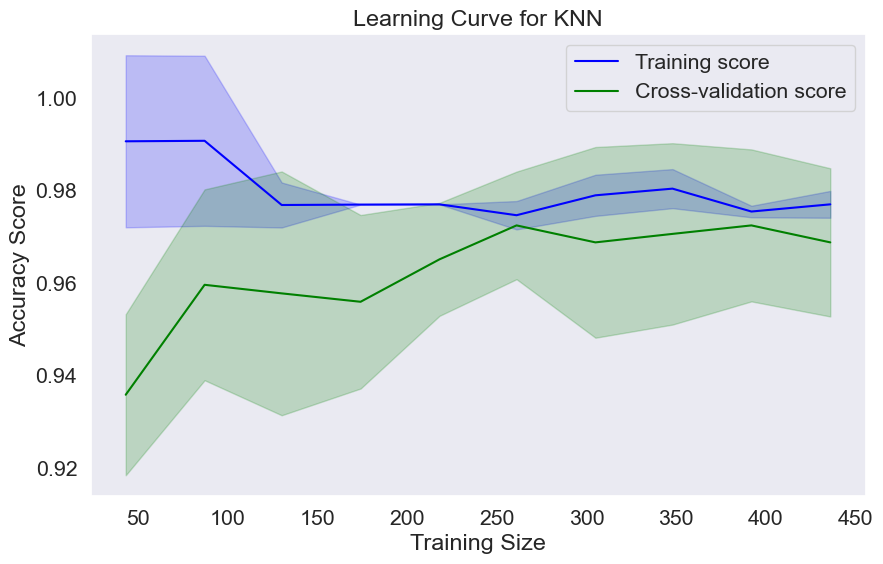

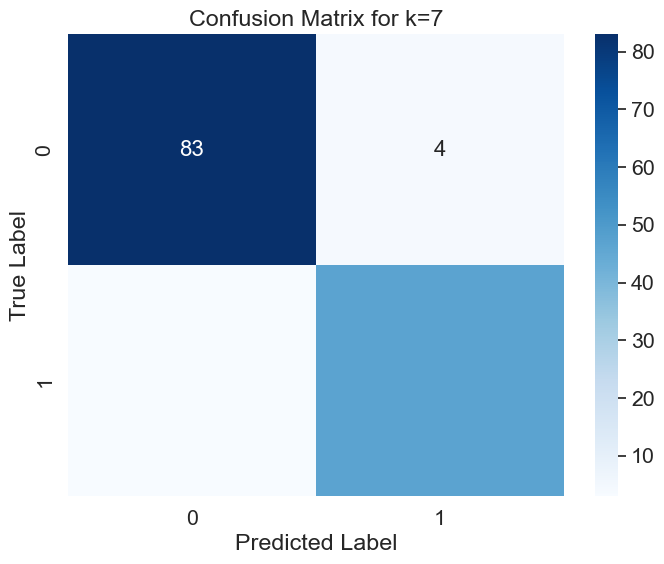

k: 9
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


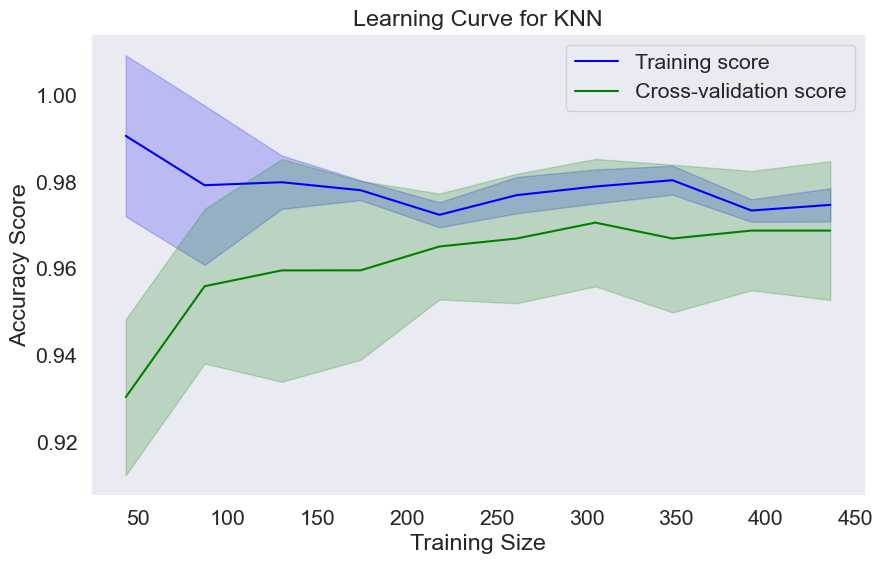

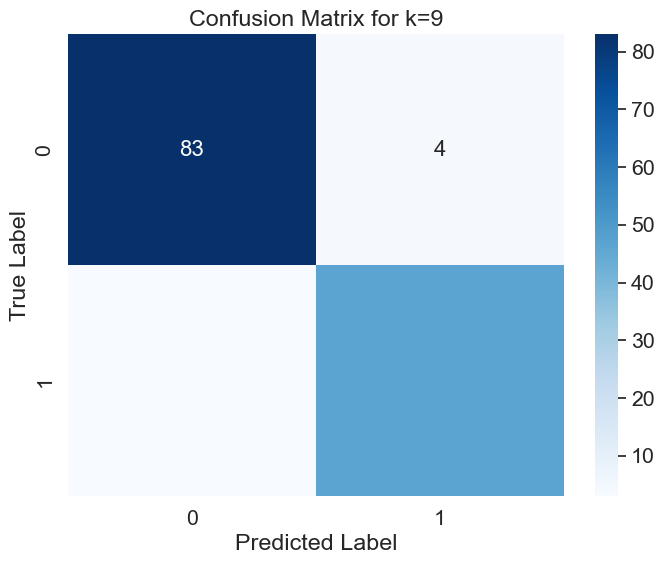

k: 11
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


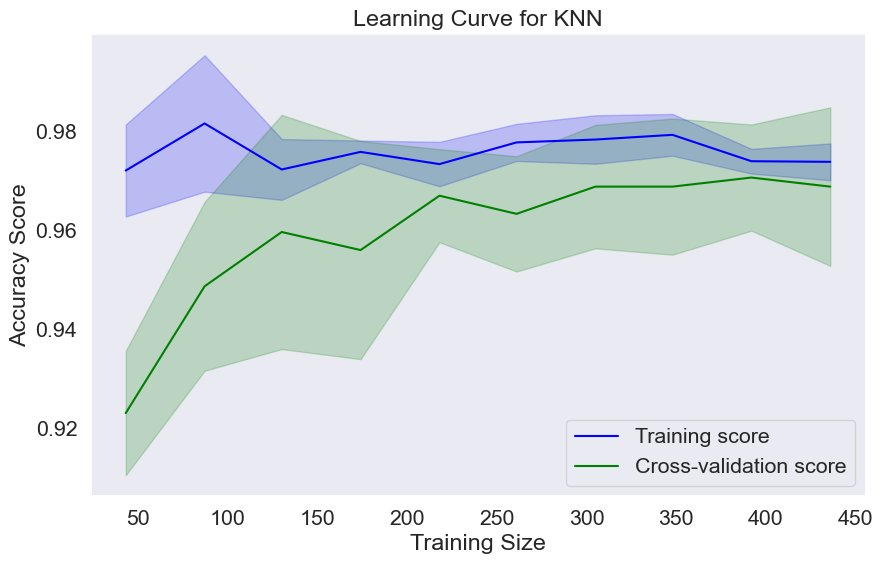

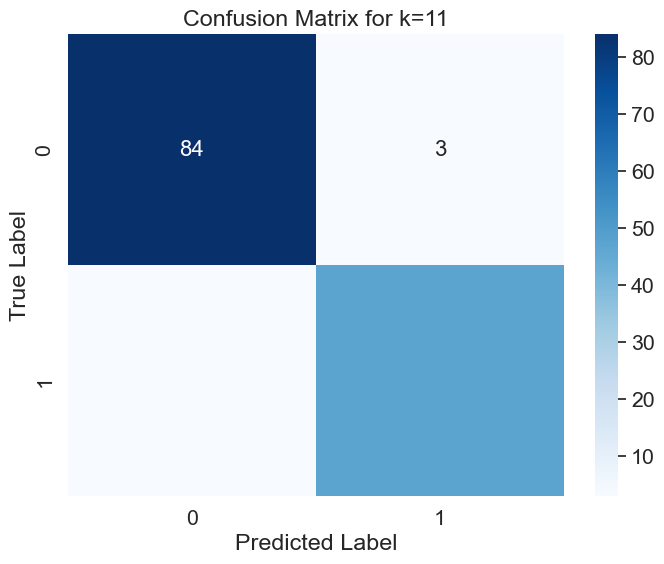

k: 13
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


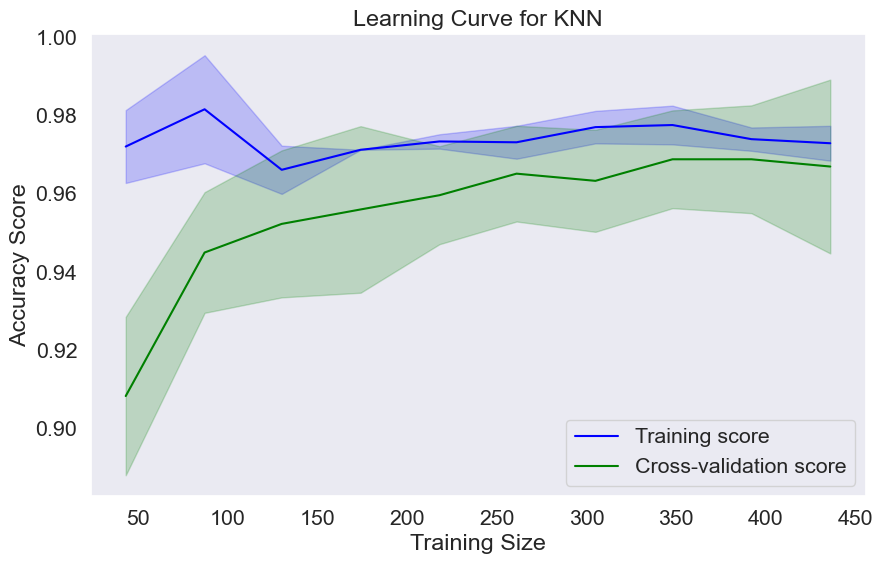

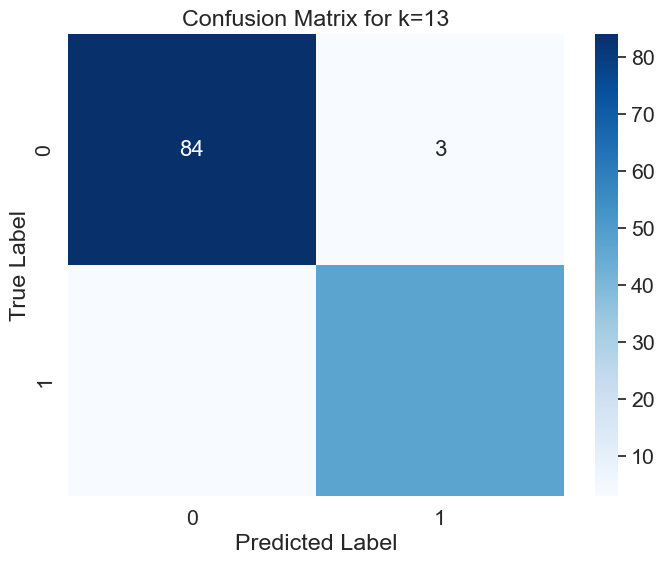

k: 15
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


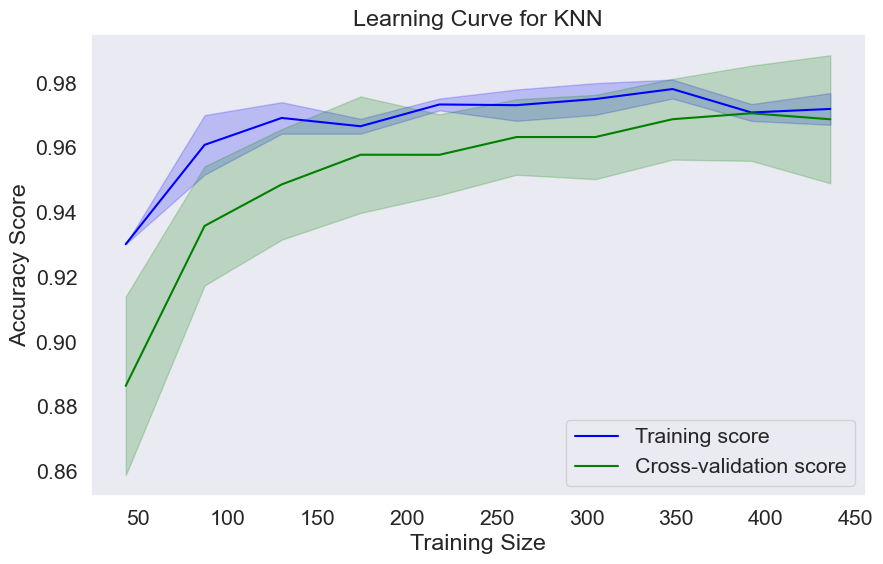

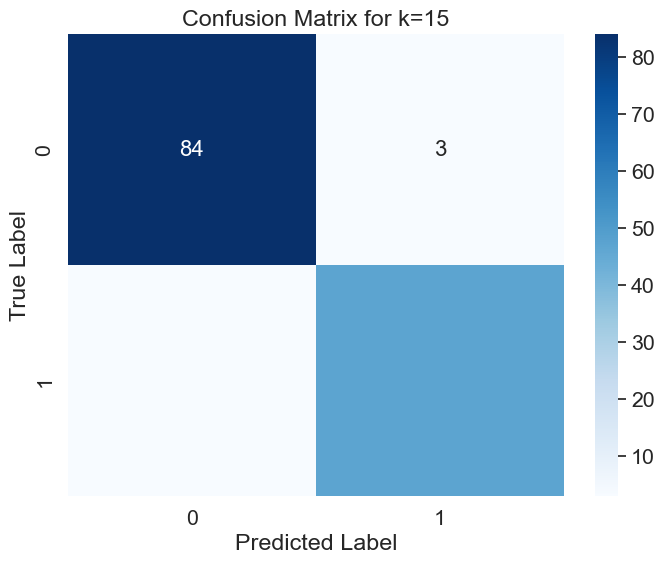

In [63]:
for result in knn_results:
    print(f"k: {result['k']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(result['train_sizes'], result['train_mean'], label='Training score', color='blue')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], color='blue', alpha=0.2)
    plt.plot(result['train_sizes'], result['validation_mean'], label='Cross-validation score', color='green')
    plt.fill_between(result['train_sizes'], result['validation_mean'] - result['validation_std'], result['validation_mean'] + result['validation_std'], color='green', alpha=0.2)

    plt.title('Learning Curve for KNN')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for k={result["k"]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [64]:
# Define different SVM kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store results
svm_results = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=34)
    svm.fit(cX_train, cy_train)
    
    predictions = svm.predict(cX_test)
    conf_matrix = cm(cy_test, predictions)
    class_report = cr(cy_test, predictions)
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=svm,
        X=cX_train,
        y=cy_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    svm_results.append(
        {'kernel': kernel,
         'svm': svm,
         'confusion_matrix': conf_matrix,
         'classification_report': class_report,
         'train_mean': train_mean,
         'train_std': train_std,
         'train_sizes': train_sizes,
         'validation_mean': validation_mean,
         'validation_std': validation_std}
    )

Kernel: linear
Confusion Matrix:
[[84  3]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        87
           4       0.94      0.92      0.93        50

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.94       137
weighted avg       0.95      0.95      0.95       137


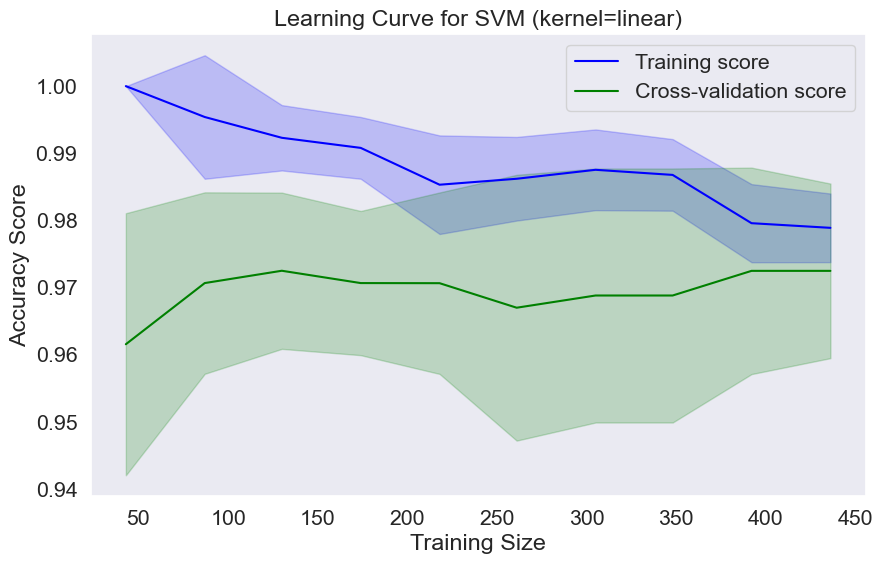

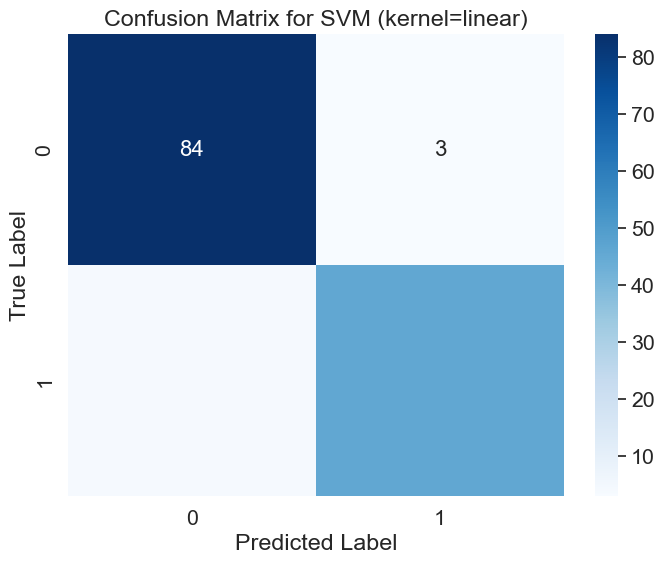

Kernel: poly
Confusion Matrix:
[[86  1]
 [ 4 46]]
Classification Report:
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        87
           4       0.98      0.92      0.95        50

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137


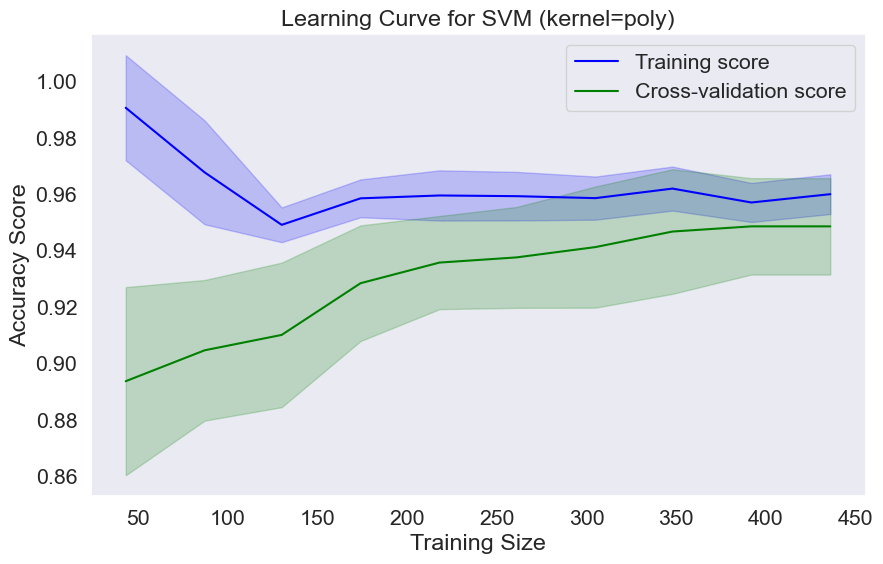

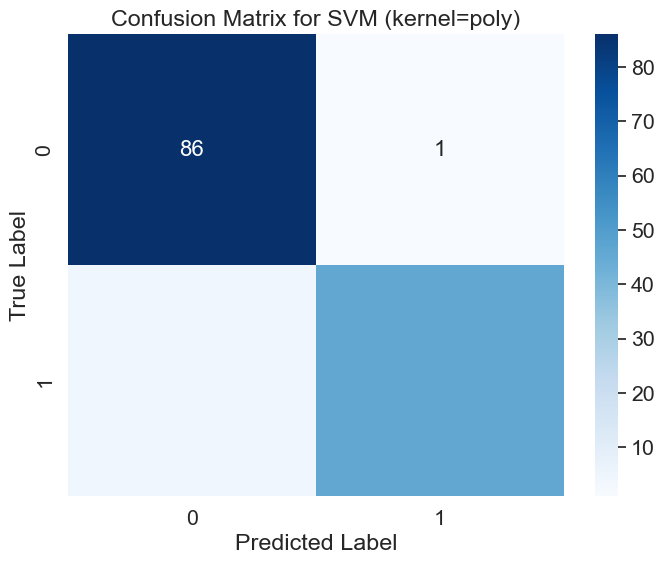

Kernel: rbf
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


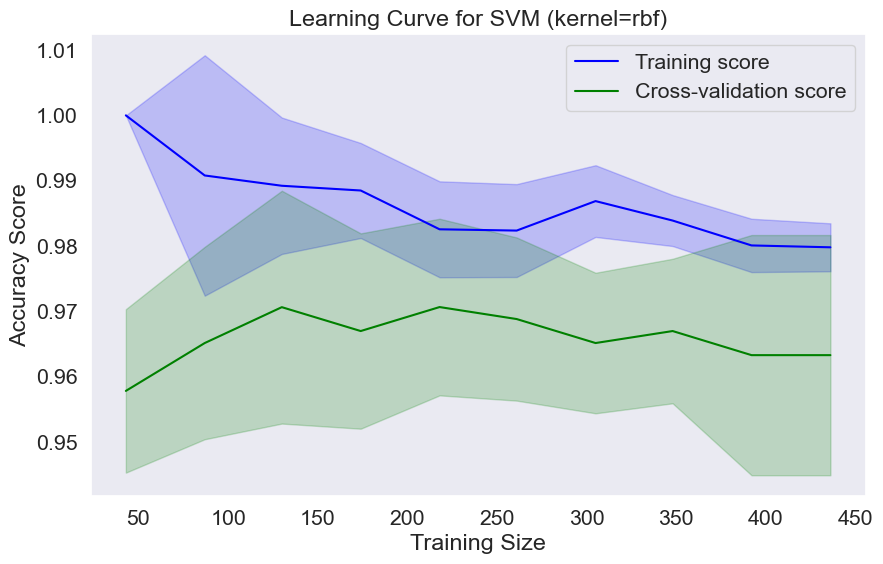

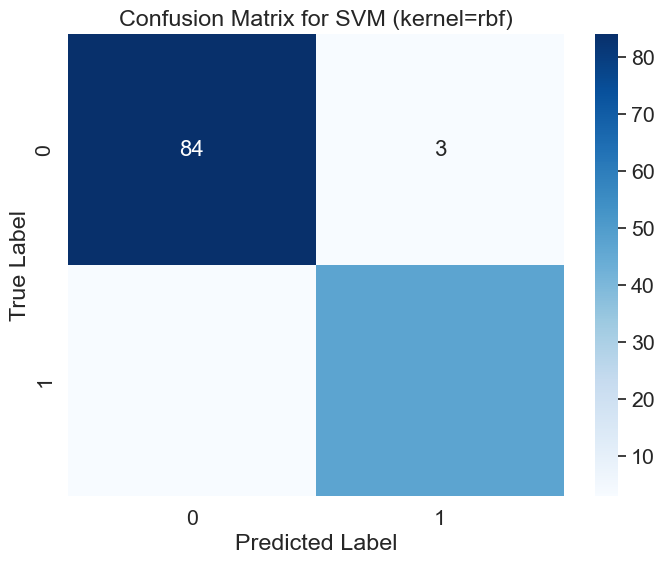

Kernel: sigmoid
Confusion Matrix:
[[84  3]
 [ 2 48]]
Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        87
           4       0.94      0.96      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


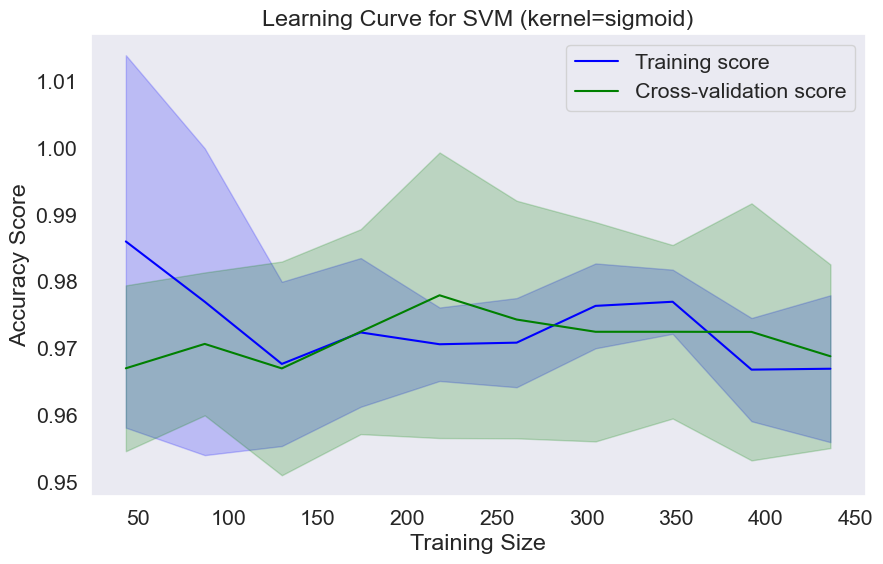

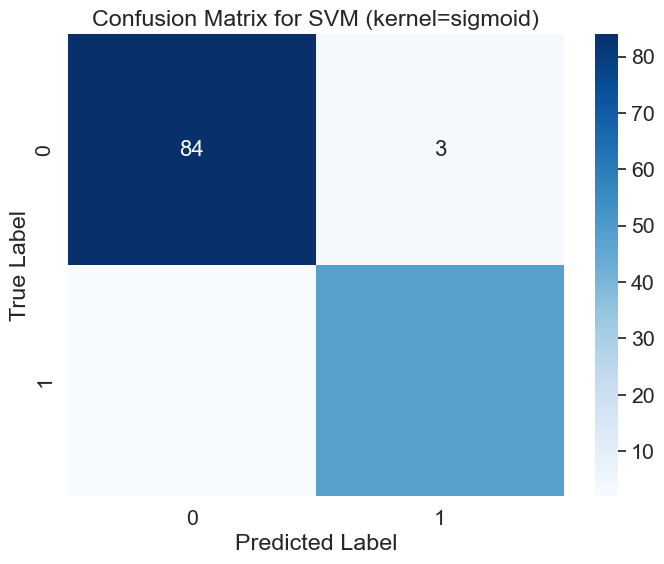

In [65]:
for result in svm_results:
    print(f"Kernel: {result['kernel']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(result['train_sizes'], result['train_mean'], label='Training score', color='blue')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], color='blue', alpha=0.2)
    plt.plot(result['train_sizes'], result['validation_mean'], label='Cross-validation score', color='green')
    plt.fill_between(result['train_sizes'], result['validation_mean'] - result['validation_std'], result['validation_mean'] + result['validation_std'], color='green', alpha=0.2)

    plt.title(f'Learning Curve for SVM (kernel={result["kernel"]})')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for SVM (kernel={result["kernel"]})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [67]:
weak_learner_depths = [1, 2, 3]

boosting_results = []

for depth in weak_learner_depths:
    weak_learner = DecisionTreeClassifier(max_depth=depth, random_state=34)
    ada_boost = AdaBoostClassifier(estimator=weak_learner, n_estimators=50, random_state=34)
    ada_boost.fit(cX_train, cy_train)
    
    predictions = ada_boost.predict(cX_test)
    conf_matrix = cm(cy_test, predictions)
    class_report = cr(cy_test, predictions)
    
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=ada_boost,
        X=cX_train,
        y=cy_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)
    
    boosting_results.append(
        {'depth': depth,
         'ada_boost': ada_boost,
         'confusion_matrix': conf_matrix,
         'classification_report': class_report,
         'train_mean': train_mean,
         'train_std': train_std,
         'train_sizes': train_sizes,
         'validation_mean': validation_mean,
         'validation_std': validation_std}
    )

/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/mavinomichael/miniconda3/envs/CS7641-A1/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the 

Weak Learner Depth: 1
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


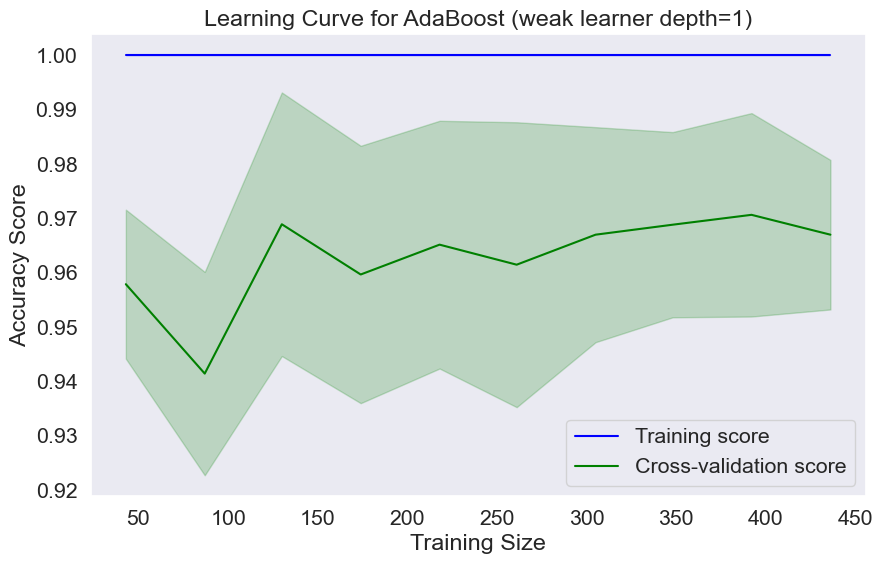

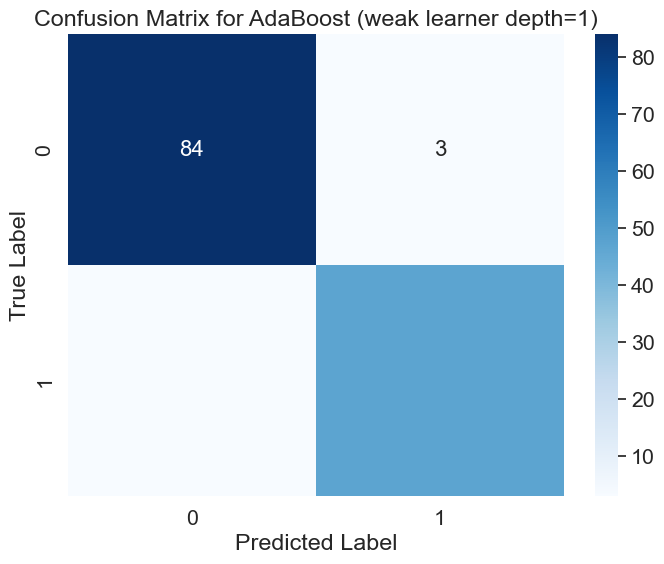

Weak Learner Depth: 2
Confusion Matrix:
[[83  4]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


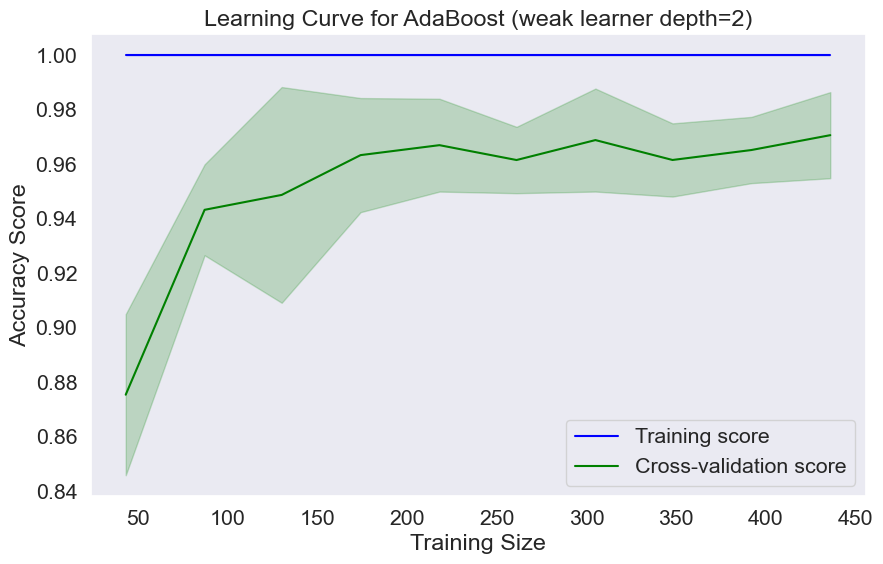

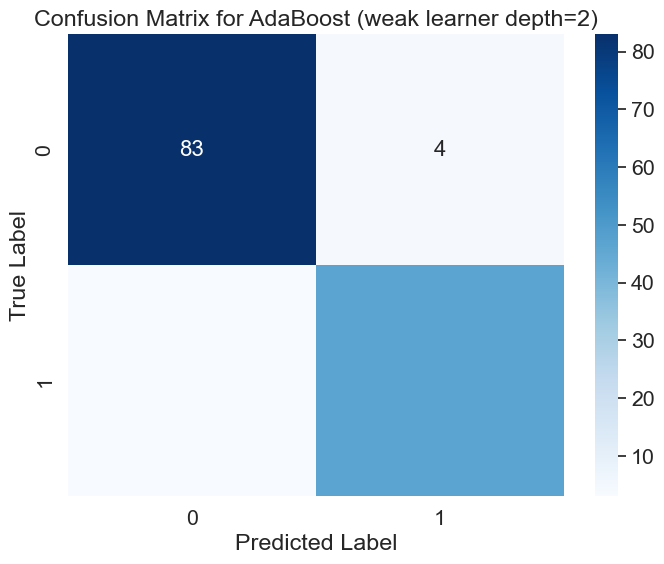

Weak Learner Depth: 3
Confusion Matrix:
[[84  3]
 [ 3 47]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137


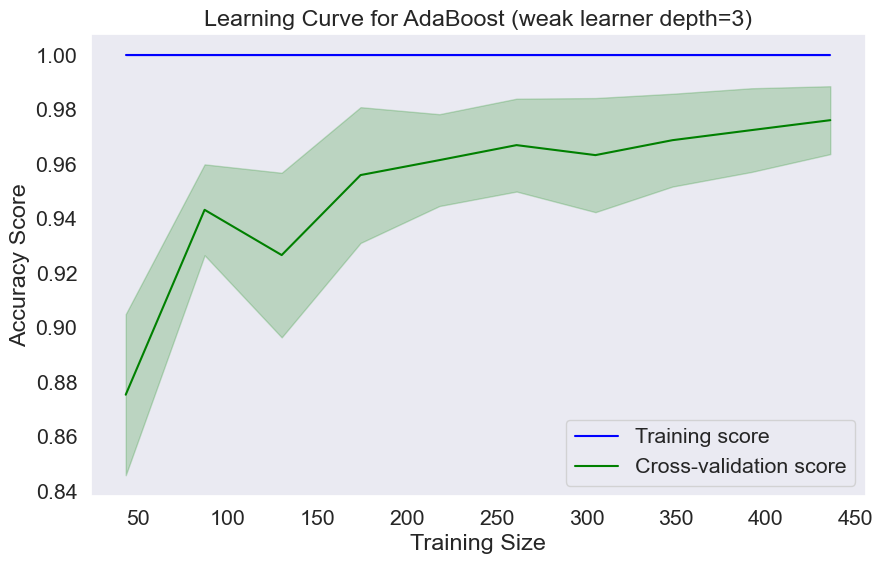

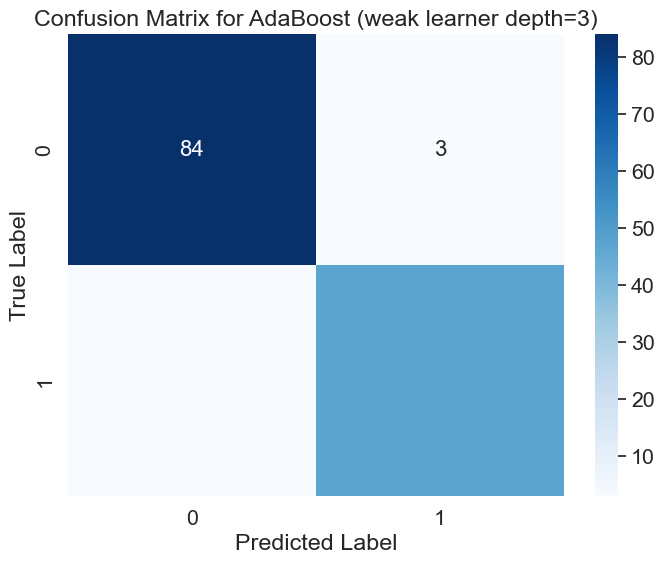

In [68]:
for result in boosting_results:
    print(f"Weak Learner Depth: {result['depth']}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(result['train_sizes'], result['train_mean'], label='Training score', color='blue')
    plt.fill_between(result['train_sizes'], result['train_mean'] - result['train_std'], result['train_mean'] + result['train_std'], color='blue', alpha=0.2)
    plt.plot(result['train_sizes'], result['validation_mean'], label='Cross-validation score', color='green')
    plt.fill_between(result['train_sizes'], result['validation_mean'] - result['validation_std'], result['validation_mean'] + result['validation_std'], color='green', alpha=0.2)

    plt.title(f'Learning Curve for AdaBoost (weak learner depth={result["depth"]})')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.4)
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'Confusion Matrix for AdaBoost (weak learner depth={result["depth"]})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()